In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import requests
import re
from IPython.core.display import display, Markdown, Latex, HTML
from IPython.display import IFrame
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.impute import KNNImputer
import os
import math
from functools import partial
import pyproj
from shapely import geometry
from shapely.ops import transform
from pyproj import CRS
from pyproj import Transformer
from functools import partial
import matplotlib.pyplot as plt
from pyproj.crs import ProjectedCRS
from pyproj.crs.coordinate_operation import AzumuthalEquidistantConversion
from shapely.ops import transform
import geopandas as gpd
import contextily as ctx
from geopandas.tools import overlay
from shapely.geometry import Point, Polygon

warnings.filterwarnings('ignore')
%matplotlib inline

In [1001]:
#Chargement de la bibliothéque Bootstrap
HTML(open("./styles/theme.min.css", "r").read())

In [1330]:
#Permet aux cellules de prendre toute la largeur de l'ecran
display(HTML("<style>.container { width:100% !important; }</style>"))

<div class="jumbotron">
<h1>Concours Smart City - Paris</h1>
<p><strong>Projet n°2</strong></p>
<p><a href="https://openclassrooms.com/fr/paths/188/projects/717/assignment" target="blank" class="btn btn-primary btn-lg">Plus d'infos</a></p><img src="https://consent.trustarc.com/get?name=oc_logo.png" width="200px">
</div>

<hr /><h1 style="text-align: center;"><span style="color: #666699;">💾 <em><strong>Importation et apercu du jeu de données</strong></em></span></h1><hr />

In [1003]:
#chargement du jeu de données
df = pd.read_csv('p2-arbres-fr.csv', sep=';')

In [1004]:
#aperçu du jeu de données
df.head(2)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031


<hr/> <h1 style="text-align: center;"><span style="color: #666699;">🔎<em><strong> Description et exploration des données</strong></em></span></h1><hr />

In [1005]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Synth&eacute;se des données statistiques</strong></em></span></h2>

In [1006]:
df.describe(include='all')

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,200137,200136,200137,30902,0.0,200137,200137,198640,200121,198385,36777,200137.000000,200137.000000,132932,137039.000000,200137.000000,200137.000000
unique,NaN,1,9,25,3795,NaN,6921,69040,192,175,539,436,NaN,NaN,4,NaN,NaN,NaN
top,NaN,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,NaN,NaN,NaN
freq,NaN,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,NaN,NaN,NaN
mean,3.872027e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.380479,13.110509,NaN,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,673.190213,1971.217387,NaN,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,5.000000,NaN,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,8.000000,NaN,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.000000,12.000000,NaN,0.000000,48.876447,2.386838


<div style="margin: 0 auto; width: 50%;"><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Informations sur les colonnes du jeu de données</strong></em></span></h2>
<table style="border-collapse: collapse; width: 100%; height: 342px;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #32a2f0; text-align: center;"><strong><span style="color: #ffffff;">Nom de variable</span></strong></td>
<td style="width: 33.3333%; height: 18px; background-color: #32a2f0; text-align: center;"><strong><span style="color: #ffffff;">Descritpion</span></strong></td>
<td style="width: 33.3333%; height: 18px; background-color: #32a2f0; text-align: center;"><strong><span style="color: #ffffff;">Type</span></strong></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>id</strong></em></td>
<td style="width: 33.3333%; height: 18px;">simple identifiant de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">entier, ex. : 244875</td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>type_emplacement</strong></em></td>
<td style="width: 33.3333%; height: 18px;">type de l'emplacement</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"Arbre"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>domanialite</strong></em></td>
<td style="width: 33.3333%; height: 18px;">type de lieu auquel appartient l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"Alignement"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>arrondissement</strong></em></td>
<td style="width: 33.3333%; height: 18px;">arrondissement de Paris o&ugrave; est situ&eacute; l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"PARIS 17E ARRDT"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>complement_addresse</strong></em></td>
<td style="width: 33.3333%; height: 18px;">complement d'adresse</td>
<td style="width: 33.3333%; height: 18px;">texte, pas d'exemple visible</td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>numero</strong></em></td>
<td style="width: 33.3333%; height: 18px;">num&eacute;ro de l'adresse</td>
<td style="width: 33.3333%; height: 18px;">texte, pas d'exemple visible</td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>lieu</strong></em></td>
<td style="width: 33.3333%; height: 18px;">adresse de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"116 RUE DE GRENELLE PARIS 7E"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>id_emplacement</strong></em></td>
<td style="width: 33.3333%; height: 18px;">identifiant de l'emplacement</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"19"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>libelle_francais</strong></em></td>
<td style="width: 33.3333%; height: 18px;">nom commun (vernaculaire) de l'esp&egrave;ce de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"Marronnier"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>genre</strong></em></td>
<td style="width: 33.3333%; height: 18px;">genre de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"Aesculus"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>espece</strong></em></td>
<td style="width: 33.3333%; height: 18px;">esp&egrave;ce de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"hippocastanum"</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>variete</strong></em></td>
<td style="width: 33.3333%; height: 18px;">vari&eacute;t&eacute; de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, pas d'exemple visible</td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>circonference_cm</strong></em></td>
<td style="width: 33.3333%; height: 18px;">circonf&eacute;rence en centim&egrave;tres de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">entier, ex. :&nbsp;<code>20</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>hauteur_m</strong></em></td>
<td style="width: 33.3333%; height: 18px;">taille en m&egrave;tres de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">entier, ex. :&nbsp;<code>5</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>stade_developpement</strong></em></td>
<td style="width: 33.3333%; height: 18px;">stade de d&eacute;veloppement de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">texte, ex. :&nbsp;<code>"A"</code>&nbsp;pour "Adulte"</td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>remarquable</strong></em></td>
<td style="width: 33.3333%; height: 18px;">si l'arbre est "remarquable" ou pas</td>
<td style="width: 33.3333%; height: 18px;">bool&eacute;en, ex. :&nbsp;<code>0</code>&nbsp;pour un arbre "non remarquable"</td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>geo_point_2d_a</strong></em></td>
<td style="width: 33.3333%; height: 18px;">latitude de la position de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">nombre &agrave; virgule, ex. :&nbsp;<code>48.857620</code></td>
</tr>
<tr style="height: 18px;">
<td style="width: 33.3333%; height: 18px; background-color: #dfdddd; text-align: center;"><em><strong>geo_point_2d_b</strong></em></td>
<td style="width: 33.3333%; height: 18px;">longitude de la position de l'arbre</td>
<td style="width: 33.3333%; height: 18px;">nombre &agrave; virgule, ex. :&nbsp;<code>2.320962</code></td>
</tr>
</tbody>
</table></div>

<hr/>
<h1 style="text-align: center;"><span style="color: #666699;">🚿<em><strong>Néttoyage des données</strong></em></span></h1>

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Suppression des colonnes inutiles</strong></em></span></h2>

In [1007]:
#la colonne 'type_emplacement' contient une valeur constante ("arbre")
del df['type_emplacement']

#la colonne 'numero' contient aucune valeur  
del df['numero']

#la colonne 'id_emplacement' contient des valeurs incohérente non expoitable 
del df['id_emplacement']

#la colonne 'espece' contient des valeurs que nous n'utiliserons pas
del df['espece']

#le colonne 'lieu' contient des valeurs que nous n'utiliserons pas
del df['lieu']

#le colonne 'variete' contient des valeurs que nous n'utiliserons pas
del df['variete']

#le colonne 'complement_addresse' contient des valeurs que nous n'utiliserons pas
del df['complement_addresse']


<div style="margin: 0 auto; width: 50%;"><h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Synth&eacute;se des types de variables retenues</strong></em></span></h2>
<table style="height: 108px; width: 100%; border-collapse: collapse;" border="3">
<tbody>
<tr style="height: 18px;">
<td style="width: 39.7942%; background-color: #4090ec; height: 18px; text-align: center;" colspan="2"><span style="color: #ffffff;"><strong>Quantitative</strong></span></td>
<td style="width: 60.2058%; height: 18px; background-color: #e69a04; text-align: center;" colspan="3"><span style="color: #ffffff;"><strong>Qualitative</strong></span></td>
</tr>
<tr style="height: 18px;">
<td style="width: 20%; height: 18px; background-color: #d0cece; text-align: center;">Continue</td>
<td style="width: 19.7942%; height: 18px; background-color: #f7e17c; text-align: center;">Discr&eacute;te</td>
<td style="width: 20.2058%; height: 18px; background-color: #d0cece; text-align: center;">Nominale</td>
<td style="width: 20%; height: 18px; background-color: #f7e17c; text-align: center;">Ordinale</td>
<td style="width: 20%; height: 18px; background-color: #d0cece; text-align: center;">Binaire</td>
</tr>
<tr style="height: 18px;">
<td style="width: 20%; height: 18px; text-align: center;">circonference_cm</td>
<td style="width: 19.7942%; height: 18px; text-align: center;">id</td>
<td style="width: 20.2058%; height: 18px; text-align: center;">domanialite</td>
<td style="width: 20%; height: 18px; text-align: center;">stade_developpement</td>
<td style="width: 20%; height: 18px; text-align: center;">remarquable</td>
</tr>
<tr style="height: 18px;">
<td style="width: 20%; height: 18px; text-align: center;">hauteur_m</td>
<td style="width: 19.7942%; height: 18px; text-align: center;">&nbsp;</td>
<td style="width: 20.2058%; height: 18px; text-align: center;">arrondissement</td>
<td style="width: 20%; height: 18px; text-align: center;">&nbsp;</td>
<td style="width: 20%; height: 18px; text-align: center;">&nbsp;</td>
</tr>
<tr style="height: 18px;">
<td style="width: 20%; height: 18px; text-align: center;">geo_point_2d_a</td>
<td style="width: 19.7942%; height: 18px; text-align: center;">&nbsp;</td>
<td style="width: 20.2058%; height: 18px; text-align: center;">libelle_francais</td>
<td style="width: 20%; height: 18px; text-align: center;">&nbsp;</td>
<td style="width: 20%; height: 18px; text-align: center;">&nbsp;</td>
</tr>
<tr style="height: 18px;">
<td style="width: 20%; height: 18px; text-align: center;">geo_point_2d_b</td>
<td style="width: 19.7942%; height: 18px; text-align: center;">&nbsp;</td>
<td style="width: 20.2058%; height: 18px; text-align: center;">genre</td>
<td style="width: 20%; height: 18px; text-align: center;">&nbsp;</td>
<td style="width: 20%; height: 18px; text-align: center;">&nbsp;</td>
</tr>
</tbody>
</table></div>

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Matrice des données manquantes par colonnes</strong></em></span></h2>

<AxesSubplot:>

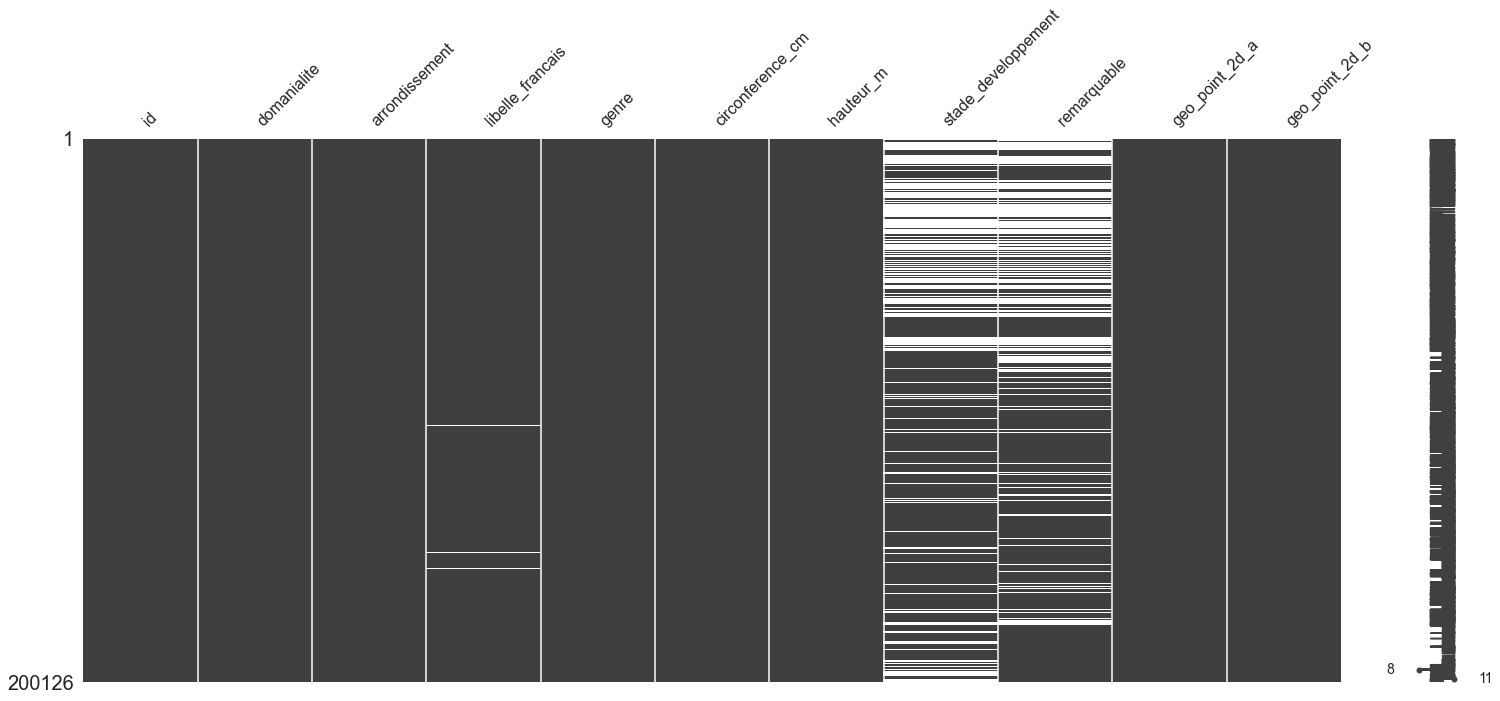

In [1252]:
msno.matrix(df)

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Tableau des valeurs NaN et des zéros</strong></em></span></h2>

In [1244]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes

        return mz_table

missing_zero_values_table(df).style.set_caption("Tableau des valeurs manquantes ou zéros").set_table_styles(styles) 

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
id,0,0,0.000000,0,0.000000,int64
domanialite,0,1,0.000500,1,0.000500,object
arrondissement,0,0,0.000000,0,0.000000,object
libelle_francais,0,1497,0.748029,1497,0.748029,object
genre,0,16,0.007995,16,0.007995,object
circonference_cm,25860,0,0.000000,25860,12.921859,int64
hauteur_m,39212,0,0.000000,39212,19.593656,int64
stade_developpement,0,67195,33.576347,67195,33.576347,object
remarquable,136848,63094,31.527138,199942,99.908058,float64
geo_point_2d_a,0,0,0.000000,0,0.000000,float64


<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Graphique du pourcentage de valeurs NaN et des zéros par colonne</strong></em></span></h2>

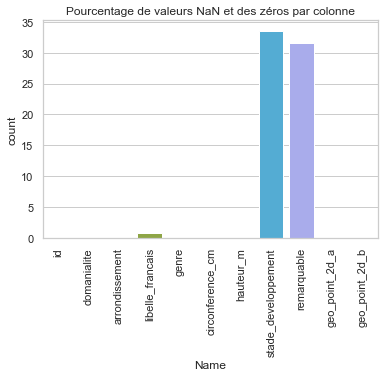

In [1254]:
def graph_miss(df):
    miss = missing_zero_values_table(df)
    missing_values = miss[['% of Total Values']]
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Name', y = 'count', data=missing_values).set_title("Pourcentage de valeurs NaN et des zéros par colonne")
    
    plt.xticks(rotation = 90)
    return plt.show()

graph_miss(df)

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Doublons : Recherche des arbres ayant exactement les mêmes coordonnées gps</strong></em></span></h2>

In [1011]:
df[df.duplicated(subset=['geo_point_2d_a','geo_point_2d_b'])].id.count()

11

In [1012]:
#pour choisir quelle ligne garder on choisi la ligne qui contient le plus d'info (le moins de NaN)
df['maxv'] = df.apply(lambda x: x.count(), axis=1)
c_maxes = df.groupby(['geo_point_2d_a','geo_point_2d_b']).maxv.transform(max)
df = df.loc[df.maxv == c_maxes]
del df['maxv']

In [1013]:
#pour ceux qui on le meme nombre de valeur renseigné on garde le 1er
df = df.drop_duplicates(subset=['geo_point_2d_a','geo_point_2d_b'],keep='first')

In [1014]:
df[df.duplicated(subset=['geo_point_2d_a','geo_point_2d_b'])].id.count()

0

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Suppression des lignes complètement vides</strong></em></span></h2>

In [1015]:
#il n'y a pas de lignes complétements vides
df.isnull().sum()

id                         0
domanialite                1
arrondissement             0
libelle_francais        1497
genre                     16
circonference_cm           0
hauteur_m                  0
stade_developpement    67195
remarquable            63094
geo_point_2d_a             0
geo_point_2d_b             0
dtype: int64

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Analysons les données manquantes des valeurs Circonférence et Hauteur</strong></em></span></h2>

In [1245]:
def tab_miss_ch(df):
    return missing_zero_values_table(df).loc[('circonference_cm','hauteur_m'),:]
    
tab_miss_ch(df).style.set_caption("Tableau des valeurs manquantes ou zéros").set_table_styles(styles) 

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
circonference_cm,25860,0,0.000000,25860,12.921859,int64
hauteur_m,39212,0,0.000000,39212,19.593656,int64


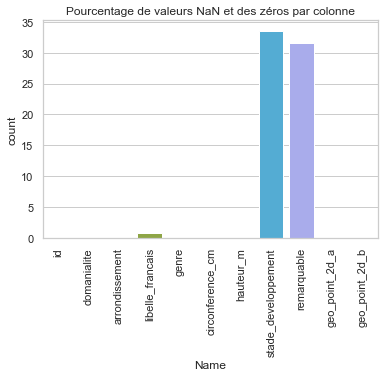

In [1255]:
graph_miss(df)

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>On remplace les zéros par des NaN pour les valeurs Circonférence et Hauteur</strong></em></span></h2>

In [1262]:
df_clean = df.copy()
df_clean['circonference_cm'].where(df_clean['circonference_cm'] > 0, inplace=True)
df_clean['hauteur_m'].where(df_clean['hauteur_m'] > 0, inplace=True)

In [1263]:
tab_miss_ch(df_clean).style.set_caption("Tableau des valeurs manquantes ou zéros").set_table_styles(styles) 

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
circonference_cm,0,25860,12.921859,25860,12.921859,float64
hauteur_m,0,39212,19.593656,39212,19.593656,float64


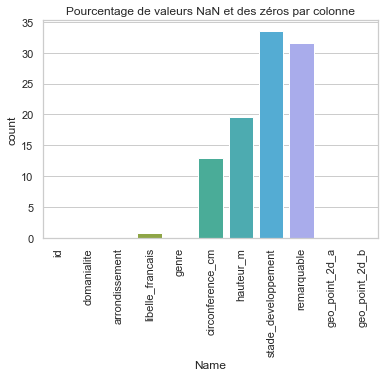

In [1270]:
graph_miss(df_clean)

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Y-a-t-il des valeurs abbérentes pour Circonférence et Hauteur ?</strong></em></span></h2>

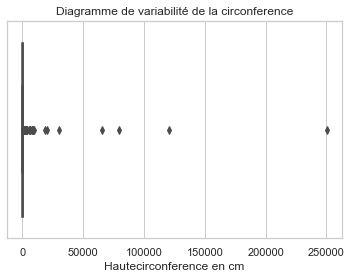

In [1273]:
box_circ = sns.boxplot(df_clean['circonference_cm'])
box_circ.set_title("Diagramme de variabilité de la circonference")
box_circ.set_xlabel("Hautecirconference en cm")
plt.show()

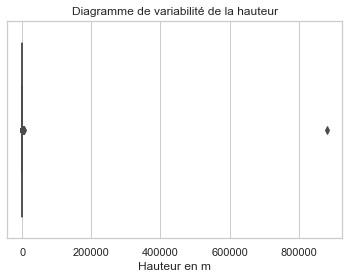

In [1274]:
box_circ = sns.boxplot(df_clean['hauteur_m'])
box_circ.set_title("Diagramme de variabilité de la hauteur")
box_circ.set_xlabel("Hauteur en m")
plt.show()

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>On remplace les valeurs abbérantes par des NaN avec la methode IQR pour circonférence et hauteur</strong></em></span></h2>

In [1275]:
# Let's compute the InterQuartile range in order to identify outliers
quartiles = df_clean[['circonference_cm', 'hauteur_m']].quantile([0.25, 0.75])
iqr = quartiles.loc[0.75]-quartiles.loc[0.25]
limits = pd.DataFrame({
    'circonference_cm': [
        max(0, quartiles.loc[0.25,'circonference_cm'] - 1.5 * iqr['circonference_cm']), # min
        quartiles.loc[0.75,'circonference_cm'] + 1.5 * iqr['circonference_cm'], # max
    ],
    'hauteur_m': [
        max(0, quartiles.loc[0.25,'hauteur_m'] - 1.5 * iqr['hauteur_m']), # min
        quartiles.loc[0.75,'hauteur_m'] + 1.5 * iqr['hauteur_m'], # max
    ]
}, index=['min', 'max'])

display(quartiles, limits)

,circonference_cm,hauteur_m
0.25,45.0,6.0
0.75,123.0,14.0


,circonference_cm,hauteur_m
min,0.0,0.0
max,240.0,26.0


In [1276]:
# outliers are the trees outside the IQR range
outliers = df_clean[
    ( df_clean['circonference_cm'] <= limits.loc['min','circonference_cm'] )
    | ( df_clean['circonference_cm'] >= limits.loc['max','circonference_cm'] )
    | ( df_clean['hauteur_m'] <= limits.loc['min','hauteur_m'] )
    | ( df_clean['hauteur_m'] >= limits.loc['max','hauteur_m'] )
]

In [1277]:
# set to NaN data that are outside the range
for col in ['circonference_cm', 'hauteur_m']:
    df_clean[col] = df_clean[col].where(( 
        ( limits.loc['min', col] < df_clean[col] )
        & ( df_clean[col] < limits.loc['max', col] ) 
    ))

In [1278]:
tab_miss_ch(df_clean).style.set_caption("Tableau des valeurs manquantes ou zéros").set_table_styles(styles) 

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
circonference_cm,0,29777,14.879126,29777,14.879126,float64
hauteur_m,0,40604,20.289218,40604,20.289218,float64


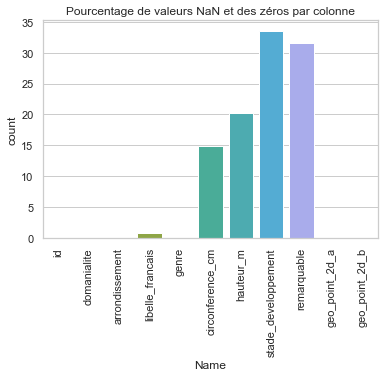

In [1279]:
graph_miss(df_clean)

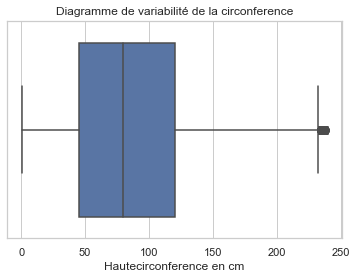

In [1280]:
box_circ = sns.boxplot(df_clean['circonference_cm'])
box_circ.set_title("Diagramme de variabilité de la circonference")
box_circ.set_xlabel("Hautecirconference en cm")
plt.show()

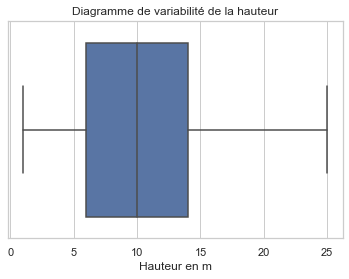

In [1281]:
box_circ = sns.boxplot(df_clean['hauteur_m'])
box_circ.set_title("Diagramme de variabilité de la hauteur")
box_circ.set_xlabel("Hauteur en m")
plt.show()

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>Y-t-il a des corrélations dans l'absence des données ?</strong></em></span></h2>

<AxesSubplot:>

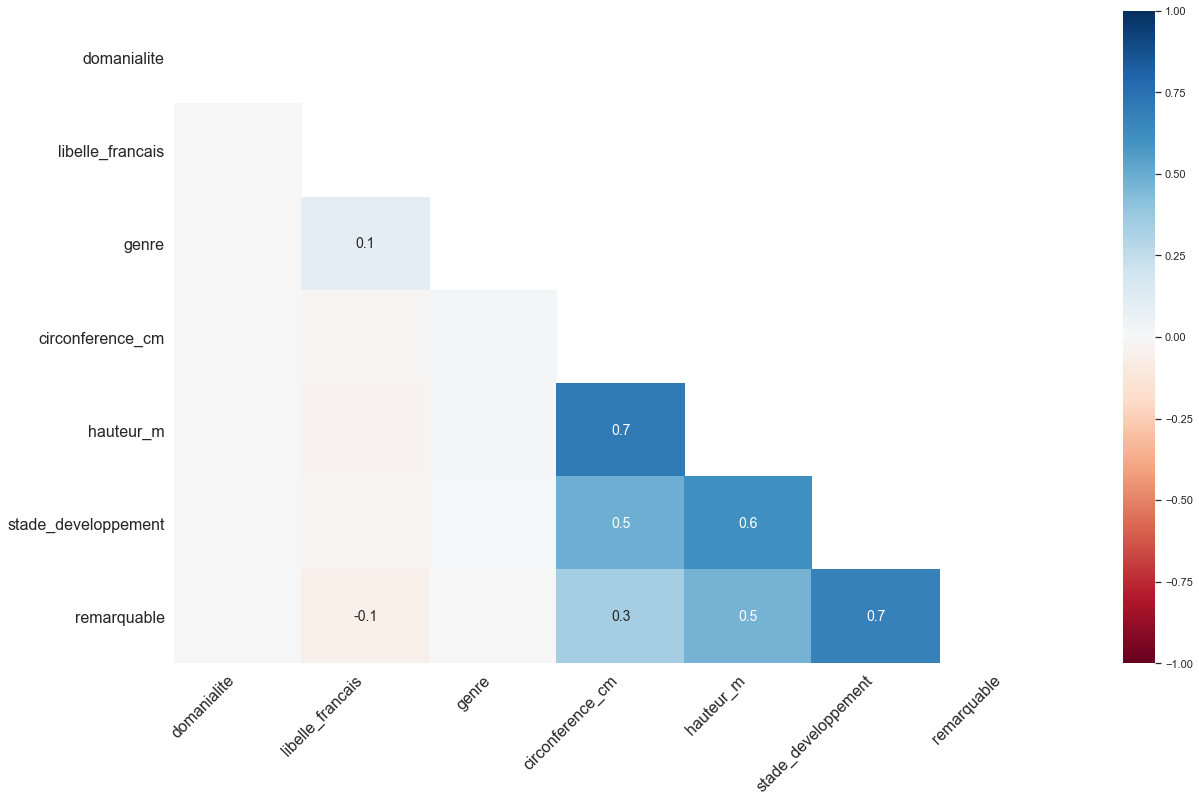

In [1283]:
msno.heatmap(df_clean)

<AxesSubplot:>

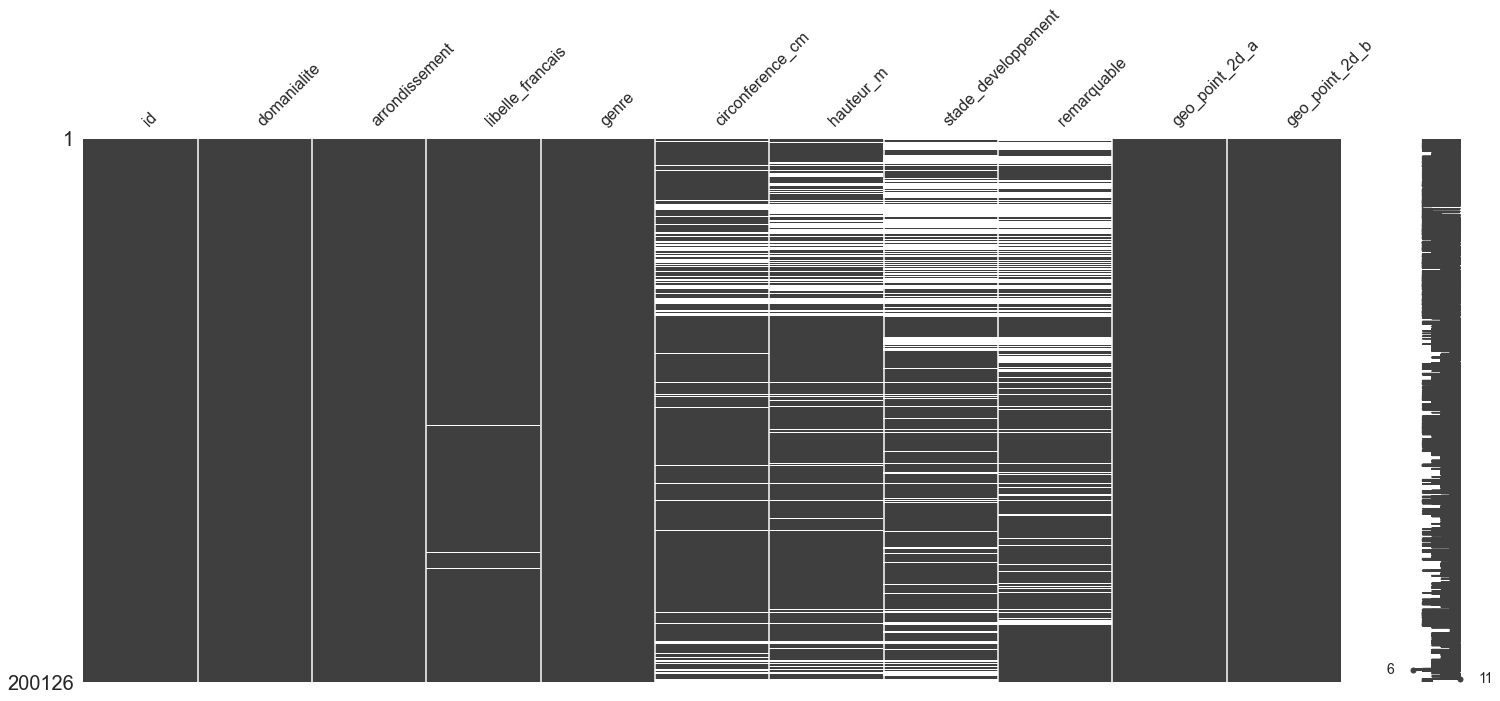

In [1284]:
msno.matrix(df_clean)

<h2 style="text-align: center;"><span style="color: #666699;"><em><strong>💡 Stratégie d'imputation</strong></em></span></h2>

<p><span style="color: #666699;">On remarque grace &agrave; ces deux graphiques qu'il y a plus de donn&eacute;es manquantes pour la hauteur que pour la circonf&eacute;rence et encore plus de donn&eacute;es manquantes pour le stade de d&eacute;veloppement</span></p>
<p><span style="color: #666699;">De plus on voit qu'a chaque fois qu'il manque la circonf&eacute;rence il manque la hauteur et le stade de d&eacute;veloppement mais pas inversement</span></p>
<p><span style="color: #666699;">Pour la hauteur ceci peut s'expliquer par le fait que la mesure est plus difficile et prend plus de temps (il faut pouvoir ce mettre &agrave; une certaine distance et faire des calculs g&eacute;ometrique) et cette mesure n'est pas une information aussi primordiale que la circonf&eacute;rence qui, apport&eacute; &agrave; l'esp&eacute;ce (ayant des courbes de croissance differente) permet d'estimer l'&acirc;ge de l'arbre et en comparaison avec le stade de d&eacute;veloppement permet de d&eacute;terminer si l'arbre a une croissance normale. </span></p>
<p><span style="color: #666699;">Les mesures de hauteur qui peuvent etre importantes sont celles qui sortent des valeurs communes mais elles peuveut etre facilement observ&eacute;es et feront alors parti des arbres remarquables ( on pourra verifier cet hypotheses lors de l'analyse des correlations ) </span></p>
<p><span style="color: #666699;">Le but etant d'optimiser les tourn&eacute;es d'entretien chaque arbre est important et on ne peux donc supprimer aucun enregistrement. A partir de ces informations la strat&eacute;gie de nettoyage sera l'imputation des valeurs des valeurs manquantes.</span></p>
<ol>
<li><span style="color: #666699;">Retrouver les informations sur la circonf&eacute;rence en fonction des points de la g&eacute;olocalisation car il est fort probable qu'un arbre ai &agrave; peu pr&egrave;s la m&ecirc;me circonf&eacute;rence que les arbres voisins, grace &agrave; mod&eacute;le de ML ( Lequel ? )</span></li>
<li><span style="color: #666699;">Utiliser un mod&eacute;le de r&eacute;gression bas&eacute; sur la courbe de croissance de l'espece pour d&eacute;terminer les valeurs de la hauteur en fonction de la circonference</span></li>
<li><span style="color: #666699;">Utiliser la methode de KNN imputer pour determiner le stade de developpement</span></li>
</ol>
<p>&nbsp;</p>

In [1076]:
df_clean['genre'] = df_clean['genre'].fillna('Inconnu')

In [1077]:
df_clean['libelle_francais'] = df_clean['libelle_francais'].fillna('Inconnu')

In [1078]:
df_clean['circonference_cm'] = df_clean.groupby('genre').circonference_cm.transform(lambda x: x.fillna(x.median()))

In [1079]:
df_clean['circonference_cm'] = df_clean.groupby('libelle_francais').circonference_cm.transform(lambda x: x.fillna(x.median()))

In [1080]:
df_clean['circonference_cm'] = df_clean.groupby('arrondissement').circonference_cm.transform(lambda x: x.fillna(x.median()))

In [1081]:
df_clean['hauteur_m'] = df_clean.groupby('genre').hauteur_m.transform(lambda x: x.fillna(x.median()))

In [1082]:
df_clean['hauteur_m'] = df_clean.groupby('libelle_francais').hauteur_m.transform(lambda x: x.fillna(x.median()))

In [1083]:
df_clean['hauteur_m'] = df_clean.groupby('arrondissement').hauteur_m.transform(lambda x: x.fillna(x.median()))

In [1084]:
df_clean['remarquable'] = df_clean.remarquable.transform(lambda x: x.fillna(0))

In [1243]:
missing_zero_values_table(df_clean).style.set_caption("Tableau des valeurs manquantes ou zéros").set_table_styles(styles) 

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
id,0,0,0.000000,0,0.000000,float64
domanialite,0,0,0.000000,0,0.000000,object
arrondissement,0,0,0.000000,0,0.000000,object
libelle_francais,0,0,0.000000,0,0.000000,object
genre,0,0,0.000000,0,0.000000,object
remarquable,199930,0,0.000000,199930,99.908052,float64
geo_point_2d_a,0,0,0.000000,0,0.000000,float64
geo_point_2d_b,0,0,0.000000,0,0.000000,float64
circonference_cm,0,0,0.000000,0,0.000000,float64
hauteur_m,0,0,0.000000,0,0.000000,float64


In [1086]:
df_clean.head(1)

,id,domanialite,arrondissement,libelle_francais,genre,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Jardin,PARIS 7E ARRDT,Marronnier,Aesculus,20.0,5.0,NaN,0.0,48.85762,2.320962


<h3 style="text-align: center;"><em><span style="color: #654699;">La variable 'stade_developpement' etant qualitative ordinale on peut la transformer en quantitative discréte afin de l'integrer dans l'etude des corrélations entre variable quantitative</span></em></h3>

In [1087]:
# On passe les valeurs catégorielles de stade_developpement en numérique pour pourvoir faire du Machine Learning
df_clean.stade_developpement.replace({
    'J' :1, 
    'JA':2, 
    'A' :3, 
    'M' :4,

}, inplace=True)

In [1088]:
dfknn = df_clean[['circonference_cm','hauteur_m','stade_developpement']]

In [1055]:
imputer1 = KNNImputer(n_neighbors=1, weights="uniform")
imputed1 = imputer1.fit_transform(dfknn)

In [1090]:
df_imputed1 = pd.DataFrame(imputed1, columns=dfknn.columns)
df_clean = df_clean.drop(['circonference_cm','hauteur_m','stade_developpement'], axis=1)
df_clean = pd.concat([df_clean, df_imputed1], axis=1)

In [1091]:
df_clean = df_clean.dropna()

In [1242]:
missing_zero_values_table(df_clean).style.set_caption("Tableau des valeurs manquantes ou zéros").set_table_styles(styles) 

,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
id,0,0,0.000000,0,0.000000,float64
domanialite,0,0,0.000000,0,0.000000,object
arrondissement,0,0,0.000000,0,0.000000,object
libelle_francais,0,0,0.000000,0,0.000000,object
genre,0,0,0.000000,0,0.000000,object
remarquable,199930,0,0.000000,199930,99.908052,float64
geo_point_2d_a,0,0,0.000000,0,0.000000,float64
geo_point_2d_b,0,0,0.000000,0,0.000000,float64
circonference_cm,0,0,0.000000,0,0.000000,float64
hauteur_m,0,0,0.000000,0,0.000000,float64


<hr/>
<h1 style="text-align: center;"><span style="color: #666699;">📈<em><strong> Analyse statistique univariée</strong></em></span></h1>

<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">'stade_developpement'</span></strong><em><span style="color: #654699;"> variable qualitative ordinale</span></em></h2>

In [1094]:
stadev = len(df_clean['stade_developpement'].dropna().unique())

<h3 style="text-align: center;"><span style="color: #654699;"><em>La variable 'stade_developpement' prend </em><strong> {{stadev}} </strong> <em>valeurs distinctes</em></span></h3>


In [1095]:
# On repasse a des valeurs catégorielles de stade_developpement 
df_clean.stade_developpement.replace({
    1 :'Jeune', 
    2 :'Jeune Adulte', 
    3 :'Adulte', 
    4 :'Mature',

}, inplace=True)

<h3 style="text-align: center;"><span style="color: #654699;"><em>Tableau de distribution</em></span></h3>

In [1241]:
stade_dev = round((df_clean.stade_developpement.value_counts(normalize=True,dropna=False) * 100),1).to_frame()
stade_dev['Count'] = df_clean.stade_developpement.value_counts(dropna=False).to_list()
#stade_dev['Value'] = ['NaN','Adulte','Jeune Adulte','Jeune','Mature']
#stade_dev = stade_dev.set_index('Value')
stade_dev.rename(columns = {"stade_developpement": "Frequency %"}, inplace=True)
stade_dev.sort_index().style.set_caption("Distribution par stade de developpement").set_table_styles(styles) 

,Frequency %,Count
Adulte,50.700000,101381
Jeune,19.900000,39851
Jeune Adulte,23.700000,47347
Mature,5.800000,11535


<h3 style="text-align: center;"><span style="color: #654699;"><em>Graphique de distribution</em></span></h3>

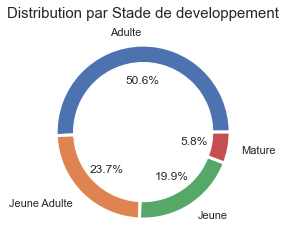

In [1240]:
stade_developpement = stade_dev['Frequency %'].value_counts(normalize=True,dropna=False)
my_circle = plt.Circle( (0,0), 0.8, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title(label="Distribution par Stade de developpement",fontsize=15)
plt.pie(stade_dev['Frequency %'], labels=stade_dev.index, autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show()

<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">🔖 Pour le Stade de developpement il en ressort que : </span></strong><br><em><span style="color: #654699;">Pratiquement la moitié des arbres sont des arbres adultes, L'autre moitié sont des arbres jeunes et jeunes adultes quant aux arbres matures ils ne représentent que 5 % </span></em></h2>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">Donc : </span></strong><br><em><span style="color: #654699;">le stade de developpement est plutôt homogène</span></em></h2>

<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">'domanialite'</span></strong><em><span style="color: #654699;"> variable qualitative nominale</span></em></h2>

In [1098]:
domi = len(df_clean['domanialite'].dropna().unique())

<h3 style="text-align: center;"><span style="color: #654699;"><em>La variable 'domanialite' prend </em><strong> {{domi}} </strong> <em>valeurs distinctes</em></span></h3>


<h3 style="text-align: center;"><span style="color: #654699;"><em>Tableau de distribution</em></span></h3>

In [1238]:
domina = round((df_clean.domanialite.value_counts(normalize=True,dropna=False) * 100),2).to_frame()
domina['Count'] = df_clean.domanialite.value_counts(dropna=False).to_list()
domina.rename(columns = {"domanialite": "Frequency %"}, inplace=True)
domina.style.set_caption("Distribution par dominalité").set_table_styles(styles) 

,Frequency %,Count
Alignement,52.440000,104948
Jardin,23.110000,46244
CIMETIERE,15.950000,31926
DASCO,3.210000,6422
PERIPHERIQUE,2.660000,5324
DJS,1.950000,3900
DFPE,0.660000,1325
DAC,0.010000,21
DASES,0.000000,4


<h3 style="text-align: center;"><span style="color: #654699;"><em>Graphique de distribution</em></span></h3>

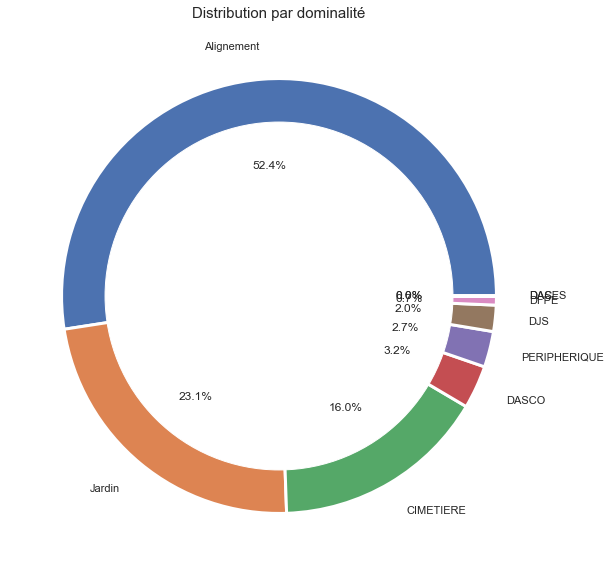

In [1317]:
dominag = domina['Frequency %'].value_counts(normalize=True,dropna=False)
plt.figure(figsize=(12,10))

my_circle = plt.Circle( (0,0), 0.8, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title(label="Distribution par dominalité",fontsize=15)
plt.pie(domina['Frequency %'], labels=domina.index, autopct='%1.1f%%', labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show()

<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">🔖 Pour la dominalité il en ressort que : </span></strong><br><em><span style="color: #654699;">les arbres d'alignement sont au nombre de 104948 (soit 52 % des arbres), ceux des parcs et jardins de 46244 arbres (23 %), ceux dans les cimetières de 31926 (soit 16 %), etc.</span></em></h2>


<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">'circonference_cm'</span><span style="color: #654699;"> & </span><span style="color: ##fa5b07;">'hauteur_m'</span></strong><em><span style="color: #654699;"> variable quantitative continue</span></em></h2>

In [1237]:
df_clean[["circonference_cm",'hauteur_m']].describe().style.set_caption("Tableau de variabilité").set_table_styles(styles) 

,circonference_cm,hauteur_m
count,200114.000000,200114.000000
mean,85.599616,9.988377
std,48.090789,4.579664
min,1.000000,1.000000
25%,50.000000,6.000000
50%,80.000000,10.000000
75%,110.000000,12.000000
max,239.000000,25.000000


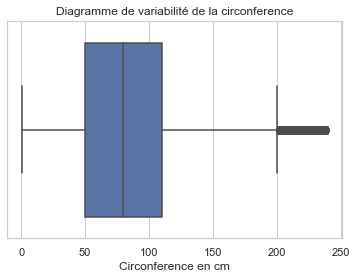

In [1148]:
box_circ = sns.boxplot(df_clean["circonference_cm"])
box_circ.set_title("Diagramme de variabilité de la circonference")
box_circ.set_xlabel("Circonference en cm")
plt.show()

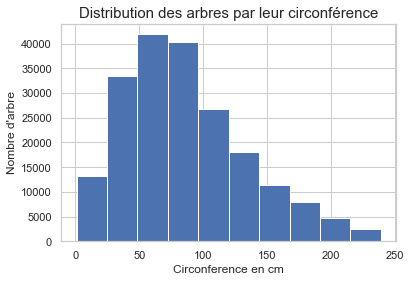

In [1162]:
plt.title(label="Distribution des arbres par leur circonférence",
          fontsize=15)
plt.xlabel('Circonference en cm')
plt.ylabel("Nombre d'arbre")
hist_circ = plt.hist(df_clean["circonference_cm"])

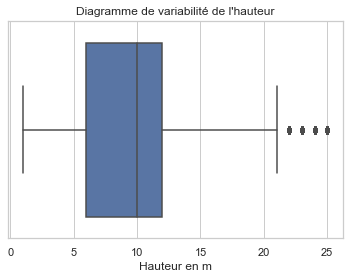

In [1149]:
box_hau = sns.boxplot(df_clean["hauteur_m"])
box_hau.set_title("Diagramme de variabilité de l'hauteur")
box_hau.set_xlabel("Hauteur en m")
plt.show()

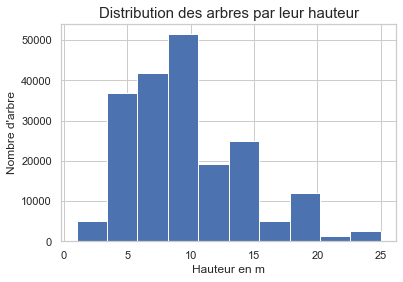

In [1161]:
plt.title(label="Distribution des arbres par leur hauteur",
          fontsize=15)
plt.xlabel('Hauteur en m')
plt.ylabel("Nombre d'arbre")
hist_circ = plt.hist(df_clean["hauteur_m"])

<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">🔖 Pour la hauteur et la circonference il en ressort que : </span></strong><br><em><span style="color: #654699;">50% des arbres ont un diametre compris entre 16cm et 35cm, et 50% des arbres à une hauteur comprise entre 6 et 12m</span></em></h2>


<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">'arrondissement'</span></strong><em><span style="color: #654699;"> variable qualitative nominale</span></em></h2>

In [1150]:
arru = len(df_clean['arrondissement'].dropna().unique())

<h3 style="text-align: center;"><span style="color: #654699;"><em>La variable 'arrondissement' prend </em><strong> {{arru}} </strong> <em>valeurs distinctes</em></span></h3>


<h3 style="text-align: center;"><span style="color: #654699;"><em>Tableau de distribution</em></span></h3>

In [1325]:
arron = round((df_clean.arrondissement.value_counts(normalize=True,dropna=False) * 100),1).to_frame()
arron['Count'] = df_clean.arrondissement.value_counts(dropna=False).to_list()
arron.rename(columns = {"arrondissement": "Frequency %"}, inplace=True)
arron.style.set_caption("Top 10 arrondissements ayant le plus d'arbre").set_table_styles(styles) 

,Frequency %,Count
PARIS 15E ARRDT,8.600000,17151
PARIS 13E ARRDT,8.400000,16712
PARIS 16E ARRDT,8.200000,16403
PARIS 20E ARRDT,7.700000,15340
PARIS 19E ARRDT,6.800000,13706
PARIS 12E ARRDT,6.300000,12599
SEINE-SAINT-DENIS,5.800000,11570
BOIS DE VINCENNES,5.700000,11503
PARIS 14E ARRDT,5.700000,11399
PARIS 17E ARRDT,5.400000,10762


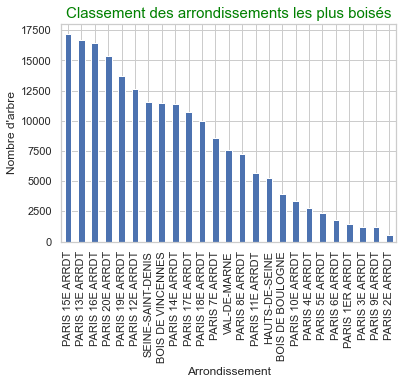

In [1160]:
arrplt = df_clean.arrondissement.value_counts().plot(kind='bar')
plt.xlabel('Arrondissement') 
plt.ylabel("Nombre d'arbre") 
#plt.title('Classement des arrondissements les plus boisés')
plt.title(label="Classement des arrondissements les plus boisés",
          fontsize=15,
          color="green")
plt.show()

In [1203]:
#Superficie et densité de Paris intramuros
dens = pd.read_csv('densite.csv')
dens.style.set_caption('Densité et Superficie des arrondissments de Paris').set_table_styles(styles) 

,Arr.,superficie (ha),densité
0,1er,183,9041
1,2e,99,21006
2,3e,117,29956
3,4e,160,16966
4,5e,254,23359
5,6e,215,19734
6,7e,409,13235
7,8e,388,9457
8,9e,218,27251
9,10e,289,31754


In [1110]:
#Uniquement Paris intra
arr = df.arrondissement[df.arrondissement.map( lambda x: 'PARIS' in x)].map( lambda x: re.sub("[^0-9]", "", x)).map( lambda x: int(x)).value_counts().to_frame().sort_index()
arr.reset_index(inplace=True)

In [1202]:
styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-size", "120%"),
    ("font-weight", "bold"),
    ("color", 'black')])] 

In [1217]:
new = dens.join(arr)
new = new[['Arr.','superficie (ha)','densité','arrondissement']].set_index('Arr.').rename(columns={'arrondissement':'Nb Arbre'})
new['Arbre / Hectare'] = round((new["Nb Arbre"] / new['superficie (ha)']),2)
new['Nb personne / Arbre'] = round((new["densité"] / new['Nb Arbre']),2)
new[['Nb Arbre','Nb personne / Arbre']].sort_values('Nb personne / Arbre').head(10).style.set_caption("Nombre de personnes pour un arbre").set_table_styles(styles) 


,Nb Arbre,Nb personne / Arbre
Arr.,,
16e,16403,1.280000
8e,7245,1.310000
13e,16712,1.530000
7e,8617,1.540000
15e,17151,1.620000
12e,12599,1.770000
19e,13706,1.990000
20e,15340,2.130000
14e,11399,2.180000


In [1327]:
#Classement des arrondissements ou il y a le plus d'arbre par hectare qui révéle des disparités très fortes de boisements entre arrondissements.
arbre_hectare = new
arbre_hectare.sort_values(by=['Arbre / Hectare'], inplace=True, ascending=False)
arbre_hectare[['Nb Arbre','Arbre / Hectare']].sort_values('Arbre / Hectare', ascending=False).head(20).style.set_caption("Top 10 des zones ayant le moins d'arbres par hectare").set_table_styles(styles) 

,Nb Arbre,Arbre / Hectare
Arr.,,
20e,15340,25.650000
13e,16712,23.370000
7e,8617,21.070000
16e,16403,20.740000
15e,17151,20.230000
14e,11399,20.210000
19e,13706,20.190000
12e,12599,19.780000
17e,10762,18.980000


<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">🔖 Des chiffres sur les arrondissements il en ressort que : </span></strong><br><em><span style="color: #654699;">Le 20e, le 13e et 7e ont approximativement une moyenne de 23 arbres par hectare contre 6 pour le 1er, le 2e et 9e soit à peu près 4 fois plus</span></em></h2>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">Donc : </span></strong><br><em><span style="color: #654699;">il existe une très forte disparité entre arrondissements, mais cela ne représentent pas précisément les taux de boisement puisqu'on ne prend en compte que les arbres gérés par le service des espaces verts de la ville</span></em></h2>


<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">'libelle_francais'</span></strong><em><span style="color: #654699;"> variable qualitative nominale</span></em></h2>

In [1304]:
libelle = len(df_clean['libelle_francais'].dropna().unique())
libelle

192

In [1219]:
libfr = round((df_clean.libelle_francais.value_counts(normalize=True,dropna=False) * 100),1).to_frame()
libfr['Count'] = df_clean.libelle_francais.value_counts(dropna=False).to_list()
libfr.rename(columns = {"libelle_francais": "Frequency %"}, inplace=True)
libfr.head(10).style.set_caption("Top 10 des arbres les plus fréquents").set_table_styles(styles) 

,Frequency %,Count
Platane,21.200000,42507
Marronnier,12.600000,25206
Tilleul,10.600000,21303
Erable,9.200000,18389
Sophora,5.900000,11797
Frêne,2.600000,5171
Pin,2.400000,4843
Micocoulier,2.100000,4201
Chêne,1.900000,3864
Cerisier à fleurs,1.900000,3767


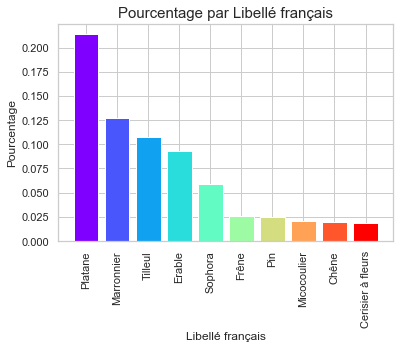

In [1225]:
import matplotlib.cm as cm
libelle = df.libelle_francais.value_counts(normalize=True).head(10)
plt.xticks(rotation = '90')
plt.title(label="Pourcentage par Libellé français",
          fontsize=15)
plt.xlabel('Libellé français')
plt.ylabel('Pourcentage')
pp = plt.bar(libelle.index,
        libelle.values,
        color = cm.rainbow(np.linspace(0, 1, len(libelle))))

In [1288]:
df_clean.groupby('genre').circonference_cm.agg([
    'count','mean','std','min','median','max','skew']).sort_values(
    'count', ascending=False).head(10).style.set_caption("Tableau des variabilités de circonference par genre").set_table_styles(styles) 

,count,mean,std,min,median,max,skew
genre,,,,,,,
Platanus,38296,104.523501,57.080245,1.000000,100.000000,239.000000,0.342556
Aesculus,22656,107.534296,54.532999,3.000000,105.000000,239.000000,0.305957
Tilia,18852,87.302992,38.906099,1.000000,85.000000,237.000000,0.508749
Acer,14144,87.786411,47.976693,3.000000,80.000000,237.000000,0.584481
Sophora,10825,86.575335,45.080132,2.000000,80.000000,236.000000,0.522005
Prunus,6044,60.002151,37.267510,4.000000,50.000000,235.000000,1.115113
Fraxinus,4493,69.895615,40.103278,8.000000,60.000000,235.000000,1.071697
Pinus,3998,90.680340,44.264386,2.000000,89.000000,237.000000,0.515622
Celtis,3667,69.362967,39.001468,10.000000,65.000000,238.000000,0.469922


<hr/>
<h2 style="text-align: center;"><strong><span style="color: ##fa5b07;">🔖 Des chiffres sur les libellés français il en ressort que : </span></strong><br><em><span style="color: #654699;">Les essences les plus nombreuses à Paris sont les platanes (21 % des arbres), puis les marronniers (13 %), les tilleuls (10 %), les érables (9 %) et ce parmi plus de 190 espèces différentes.</span></em></h2>

<hr/><h1 style="text-align: center;"><span style="color: #666699;">📝<em><strong> Synthèse de l'analyse de données</strong></em></span></h1><hr/>

<em><div style="color: #654699;">D'après la analyse de ces données on peut remarquer que le stade de développement est plutôt homogène car pratiquement la moitié des arbres sont des arbres adultes, l'autre moitié sont des arbres jeunes et jeunes adultes quant aux arbres matures ils ne représentent que 5 %.<br>

On notera ausssi qque les arbres d'alignement sont au nombre de 104948 (soit 52 % des arbres), ceux des parcs et jardins de 46244 arbres (23 %), ceux dans les cimetières de 31926 (soit 16 %), etc.
50% des arbres ont un diametre compris entre 16cm et 35cm, et 50% des arbres à une hauteur comprise entre 6 et 12m

De plus on peut clairement voir qu'il existe une très forte disparité entre arrondissements, mais cela ne représentent pas précisément les taux de boisement puisqu'on ne prend en compte que les arbres gérés par le service des espaces verts de la ville

Enfin les essences les plus nombreuses à Paris sont les platanes (21 % des arbres), puis les marronniers (13 %), les tilleuls (10 %), les érables (9 %) et ce parmi plus de 190 espèces différentes.</div></em></h2>

<hr/><h1 style="text-align: center;"><span style="color: #666699;">📊<em><strong> Analyse statistique multivariée : étude des corrélations</strong></em></span></h1><hr/>

<h3 style="text-align: center;"><em><span style="color: #654699;">Visualisation des corrélations entre variables quantitatives avec la méthode de Spearman</span></em></h3>

In [1116]:
dfp = df_clean[['circonference_cm','hauteur_m','stade_developpement','remarquable','arrondissement','libelle_francais','genre']]

In [1117]:
dfp.corr(method='spearman')

,circonference_cm,hauteur_m,remarquable
circonference_cm,1.000000,0.791911,0.009540
hauteur_m,0.791911,1.000000,0.005806
remarquable,0.009540,0.005806,1.000000


In [1118]:
from matplotlib import pyplot
dfp.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=pyplot.get_cmap('coolwarm'))

,circonference_cm,hauteur_m,remarquable
circonference_cm,1.0,0.79,0.0095
hauteur_m,0.79,1.0,0.0058
remarquable,0.0095,0.0058,1.0


<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Visualisation des corrélations entre</span></strong><span style="color: #fa5b07;"> circonférence et hauteur</span></em></h3>

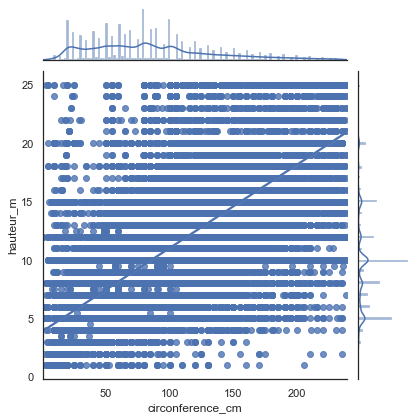

In [1119]:
with sns.axes_style('white'):
    sns.jointplot("circonference_cm", "hauteur_m", data=dfp.dropna(), kind='reg')

In [1120]:
libelle = df_clean.dropna().libelle_francais.value_counts(normalize=True).head(10).index.values
libelle

array(['Platane', 'Marronnier', 'Tilleul', 'Erable', 'Sophora', 'Frêne',
       'Pin', 'Micocoulier', 'Chêne', 'Cerisier à fleurs'], dtype=object)

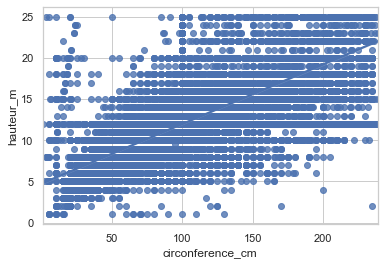

In [1121]:
z = df_clean.dropna().loc[(df['libelle_francais'] == 'Platane')]
gz = sns.regplot(x=z["circonference_cm"], y=z["hauteur_m"])

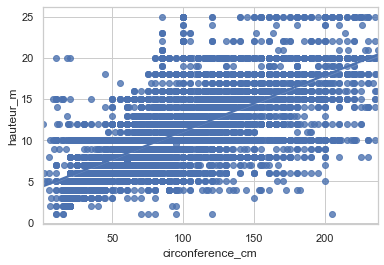

In [1122]:
z = df_clean.dropna().loc[(df['libelle_francais'] == 'Tilleul')]
gz = sns.regplot(x=z["circonference_cm"], y=z["hauteur_m"])

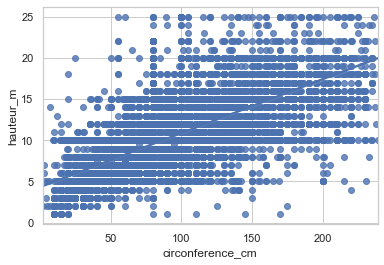

In [1123]:
z = df_clean.dropna().loc[(df['libelle_francais'] == 'Erable')]
gz = sns.regplot(x=z["circonference_cm"], y=z["hauteur_m"])

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Visualisation des corrélations entre circonférence, hauteur et stade de développement</span></em></h3>

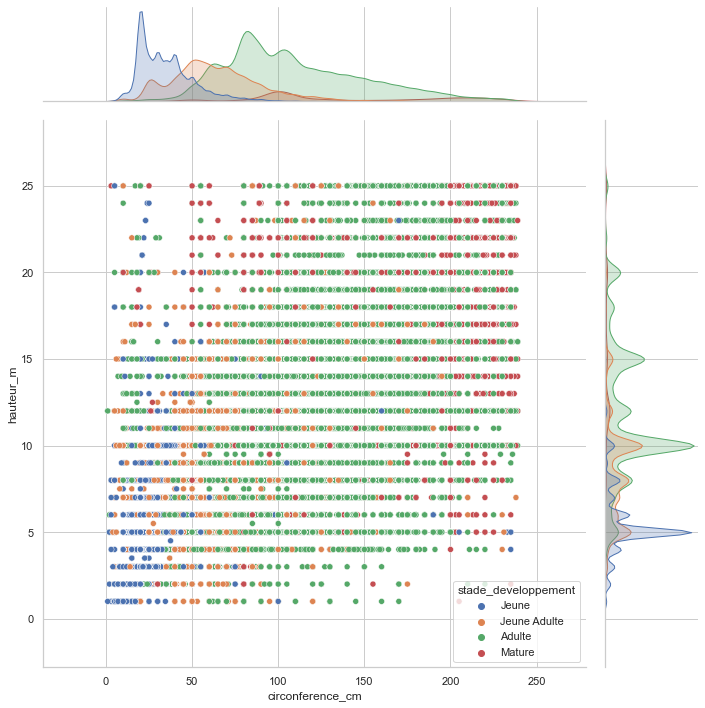

In [1124]:
clean_data_dropna = dfp.dropna()

sns_dfp = sns.jointplot(data=clean_data_dropna,
    x="circonference_cm", 
    y="hauteur_m", 
    hue="stade_developpement",
    cmap='Green',
    hue_order=['Jeune', 'Jeune Adulte', 'Adulte', 'Mature'],
    height=10,
)

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Visualisation des corrélations entre circonférence, hauteur et "remarquable" </span></em></h3>

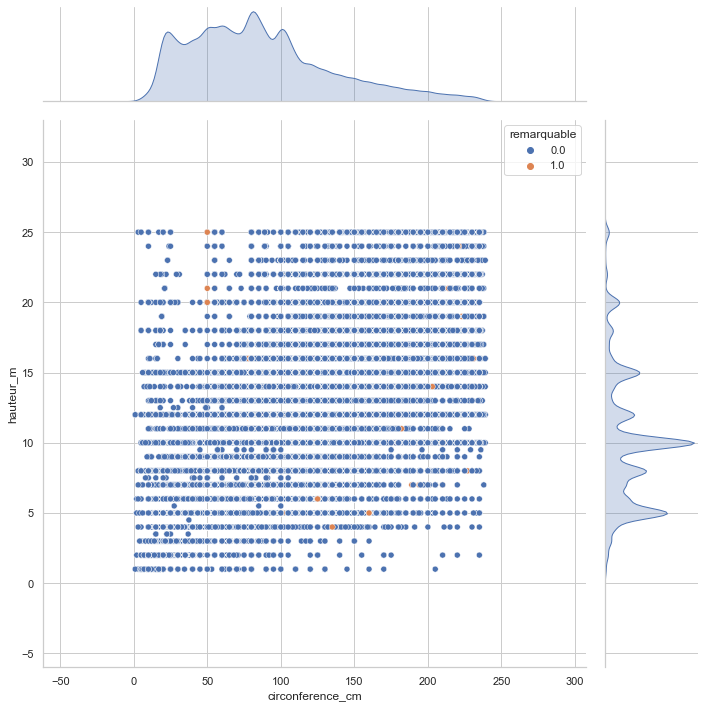

In [1125]:
clean_data_dropna = dfp.dropna()

sns_dfp = sns.jointplot(data=clean_data_dropna,
    x="circonference_cm", 
    y="hauteur_m", 
    hue="remarquable",
    height=10,
)

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Visualisation des corrélations entre stade de développement et "remarquable"</span></em></h3>

In [1126]:
dfp = dfp.dropna()

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Corrélations entre remarquable et stade_developpement</span></em></h3>

In [1127]:
format_dict = {'sum':'{:.2f}'}
rem_std = dfp.groupby(dfp['stade_developpement']).remarquable.agg(
    ['sum']).sort_values(
        'sum', ascending=False)
(rem_std.style.format(format_dict)
 .highlight_min('sum', color='red')
 .highlight_max('sum', color='lightgreen')
)

,sum
stade_developpement,
Adulte,82.00
Mature,62.00
Jeune Adulte,22.00
Jeune,18.00


<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Corrélations entre remarquable et arrondissement</span></em></h3>

In [1128]:
format_dict = {'sum':'{:.0f}'}
rem_std = dfp.groupby(dfp['arrondissement']).remarquable.agg(
    ['sum']).sort_values(
        'sum', ascending=False)
(rem_std.style.format(format_dict)
 .background_gradient(subset='sum', cmap='Blues')
)

,sum
arrondissement,
PARIS 16E ARRDT,53
PARIS 12E ARRDT,27
PARIS 20E ARRDT,15
PARIS 7E ARRDT,12
PARIS 19E ARRDT,10
PARIS 14E ARRDT,10
PARIS 18E ARRDT,10
PARIS 17E ARRDT,8
PARIS 15E ARRDT,7


<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Corrélations entre stade_developpement et arrondissement</span></em></h3>

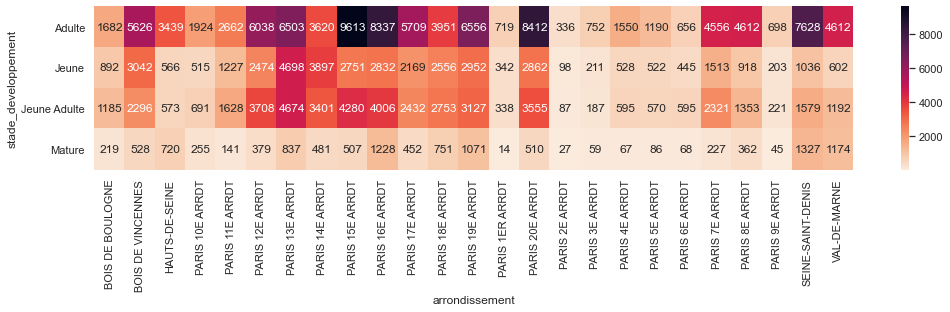

In [1129]:
cross = pd.crosstab(dfp['stade_developpement'],dfp['arrondissement'])
pyplot.figure(figsize=(17, 3))
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Corrélations entre variables qualitatives (genre d'arbre et arrondissement)</span></em></h3>

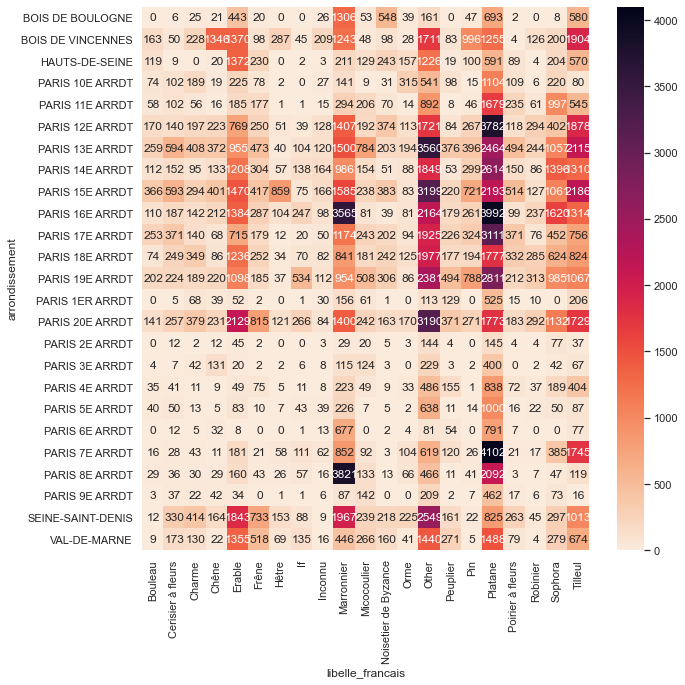

In [1130]:
col = 'libelle_francais'
freq = dfp[col].value_counts()
dfp[col] = dfp[col].where(
dfp[col].isna() | dfp[col].isin(freq.index[:20]), 
other='Other',)
cross = pd.crosstab(dfp['arrondissement'],dfp['libelle_francais'])
pyplot.figure(figsize=(10, 10))
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

<hr /><h1 style="text-align: center;"><em><strong><span style="color: #654699;">🗺 Répartition géographique</span></em></h1><hr />

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Importation des fichiers GeoJson</span></em></h3>

In [882]:
df = gpd.read_file("les-arbres.geojson")

In [883]:
df.head(1)

,libellefrancais,idemplacement,domanialite,circonferenceencm,hauteurenm,espece,adresse,arrondissement,idbase,genre,varieteoucultivar,typeemplacement,stadedeveloppement,remarquable,complementadresse,geometry
0,Bouleau,A04500044005,CIMETIERE,0,0,pendula,CIMETIERE DE BAGNEUX / AVENUE DES BOULEAUX FAS...,HAUTS-DE-SEINE,151658,Betula,''Fastigiata'',Arbre,None,None,None,POINT (2.30991 48.80669)


In [884]:
#la colonne 'type_emplacement' contient une valeur constante ("arbre")
del df['typeemplacement']

#la colonne 'id_emplacement' contient des valeurs incohérente non expoitable 
del df['idemplacement']

#la colonne 'espece' contient des valeurs que nous n'utiliserons pas
del df['espece']


#le colonne 'variete' contient des valeurs que nous n'utiliserons pas
del df['varieteoucultivar']

#le colonne 'complement_addresse' contient des valeurs que nous n'utiliserons pas
del df['complementadresse']
del df['adresse']


In [885]:
df[df.duplicated(subset=['geometry'])].idbase.count()

10

In [886]:
df = df.drop_duplicates(subset=['geometry'],keep='first')

In [ ]:
#il n'y a pas de lignes complétements vides
#df.groupby(df['libellefrancais']).idbase.count().sort_values(ascending=False).head(20)

In [887]:
df_clean = df.copy()
df_clean['circonferenceencm'].where(df_clean['circonferenceencm'] > 0, inplace=True)
df_clean['hauteurenm'].where(df_clean['hauteurenm'] > 0, inplace=True)

In [888]:
# Let's compute the InterQuartile range in order to identify outliers
quartiles = df_clean[['circonferenceencm', 'hauteurenm']].quantile([0.25, 0.75])
iqr = quartiles.loc[0.75]-quartiles.loc[0.25]
limits = pd.DataFrame({
    'circonferenceencm': [
        max(0, quartiles.loc[0.25,'circonferenceencm'] - 1.5 * iqr['circonferenceencm']), # min
        quartiles.loc[0.75,'circonferenceencm'] + 1.5 * iqr['circonferenceencm'], # max
    ],
    'hauteurenm': [
        max(0, quartiles.loc[0.25,'hauteurenm'] - 1.5 * iqr['hauteurenm']), # min
        quartiles.loc[0.75,'hauteurenm'] + 1.5 * iqr['hauteurenm'], # max
    ]
}, index=['min', 'max'])

outliers = df_clean[
    ( df_clean['circonferenceencm'] <= limits.loc['min','circonferenceencm'] )
    | ( df_clean['circonferenceencm'] >= limits.loc['max','circonferenceencm'] )
    | ( df_clean['hauteurenm'] <= limits.loc['min','hauteurenm'] )
    | ( df_clean['hauteurenm'] >= limits.loc['max','hauteurenm'] )
]
for col in ['circonferenceencm', 'hauteurenm']:
    df_clean[col] = df_clean[col].where(( 
        ( limits.loc['min', col] < df_clean[col] )
        & ( df_clean[col] < limits.loc['max', col] ) 
    ))

In [889]:
df['libellefrancais'] = df['libellefrancais'].fillna('Inconnu')

In [890]:
df.groupby(df['stadedeveloppement']).idbase.count()

stadedeveloppement
Adulte                 75356
Jeune (arbre)          33469
Jeune (arbre)Adulte    38453
Mature                  7391
Name: idbase, dtype: int64

In [891]:
df['genre'] = df['genre'].fillna('Inconnu')

In [892]:
df['remarquable'] = df.remarquable.transform(lambda x: x.fillna(0))

In [893]:
df.isnull().sum()

libellefrancais           0
domanialite               0
circonferenceencm         0
hauteurenm                0
arrondissement            0
idbase                    0
genre                     0
stadedeveloppement    49302
remarquable               0
geometry                  0
dtype: int64

In [894]:
# On passe les valeurs catégorielles de stade_developpement en numérique pour pourvoir faire du Machine Learning
df.stadedeveloppement.replace({
    "Jeune (arbre)" :1, 
    "Jeune (arbre)Adulte":2, 
    'Adulte' :3, 
    'Mature' :4,

}, inplace=True)

In [897]:
df_knn = df[['circonferenceencm','hauteurenm','stadedeveloppement']]

In [898]:
imputer = KNNImputer(n_neighbors=1, weights="uniform")
imputed = imputer.fit_transform(df_knn)

In [904]:
df_imputed = pd.DataFrame(imputed, columns=df_knn.columns)
df = df.drop(['circonferenceencm','hauteurenm','stadedeveloppement'], axis=1)
df = pd.concat([df, df_imputed], axis=1)

In [ ]:
#arbre["geometry"].plot(figsize=(20,16))

In [905]:
df.isnull().sum()

libellefrancais       10
domanialite           10
arrondissement        10
idbase                10
genre                 10
remarquable           10
geometry              10
circonferenceencm     10
hauteurenm            10
stadedeveloppement    10
dtype: int64

In [906]:
df = df.dropna()

<AxesSubplot:>

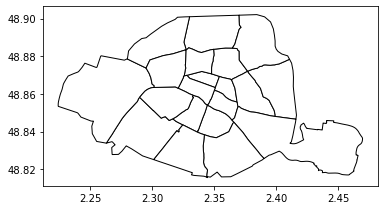

In [907]:
# load the 'arrondissement' information
dfa = gpd.read_file("arrondissements.geojson")
dfa.plot(color='white', edgecolor='black')

In [908]:
sss = Polygon([(p.x, p.y)  for p in  arbre[arbre.arrondissement=='SEINE-SAINT-DENIS'].geometry]).convex_hull
bdb = Polygon([(p.x, p.y)  for p in  arbre[arbre.arrondissement=='BOIS DE BOULOGNE'].geometry]).convex_hull
hds = Polygon([(p.x, p.y)  for p in  arbre[arbre.arrondissement=='HAUTS-DE-SEINE'].geometry]).convex_hull
bdv = Polygon([(p.x, p.y)  for p in  arbre[arbre.arrondissement=='BOIS DE VINCENNES'].geometry]).convex_hull
vdm = Polygon([(p.x, p.y)  for p in  arbre[arbre.arrondissement=='VAL-DE-MARNE'].geometry]).convex_hull

<AxesSubplot:>

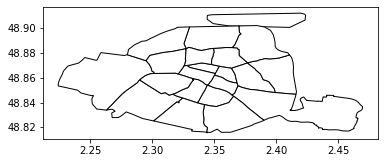

In [909]:
dfa.loc[-1] = [750001537, 0, 'Dép 93', 0, 750000093, 'Seine Saint Denis', 93000, 21, sss]  # adding a row
dfa.index = dfa.index + 1  # shifting index
dfa = dfa.sort_index()  # sorting by index
dfa.plot(color='white', edgecolor='black')

In [910]:
# load the 'quartier' information
qr = gpd.read_file("quartier_paris.geojson")
dfr = qr.copy()

<AxesSubplot:>

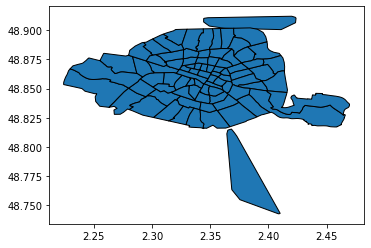

In [911]:
dfr.loc[-1] = [750001537, 0, 'SEINE-SAINT-DENIS', 0, 750000093, 'SEINE-SAINT-DENIS', 93000, 21, sss]
dfr.index = dfr.index + 1 
#dfr.loc[-1] = [750001537, 0, 'BOIS DE BOULOGNE', 0, 750000093, 'BOIS DE BOULOGNE', 93000, 22, bdb]
#dfr.index = dfr.index + 1 
#dfr.loc[-1] = [750001537, 0, 'HAUTS-DE-SEINE', 0, 750000093, 'HAUTS-DE-SEINE', 93000, 23, hds]
#dfr.index = dfr.index + 1 
#dfr.loc[-1] = [750001537, 0, 'BOIS DE VINCENNES', 0, 750000093, 'BOIS DE VINCENNES', 93000, 24, bdv]
dfr.index = dfr.index + 1 
dfr.loc[-1] = [750001537, 0, 'VAL-DE-MARNE', 0, 750000093, 'VAL-DE-MARNE', 93000, 25, vdm]
dfr.index = dfr.index + 1 
dfr = dfr.sort_index()  # sorting by index
dfr.plot(edgecolor='black')

<h3 style="text-align: center;"><em><strong><span style="color: #654699;">Style pour les titres de graphique</span></em></h3>

In [912]:
font_jeune = {'family': 'sans serif',
        'color':  '#654699',
        'weight': 'normal',
        'size': 30,
        }

<h2 style="text-align: center;"><em><strong><span style="color: #654699;">Répartition géographique des arbres jeunes</span></em></h2>

In [61]:
# On passe les valeurs catégorielles de stade_developpement en numérique pour pourvoir faire du Machine Learning
arbre.stadedeveloppement.replace({
    1 : "Jeune (arbre)",
    2 : "Jeune (arbre)Adulte",
    3 : 'Adulte',
    4 : 'Mature',

}, inplace=True)

In [62]:
jeune = arbre.loc[(arbre['stadedeveloppement'] == "Jeune (arbre)")]
jeune = gpd.sjoin(jeune, dfa[['l_ar', 'geometry']], op='within')
counts = jeune.groupby('l_ar').size()

In [63]:
dfag = dfa.merge(counts.reset_index(name='n_jeune'))

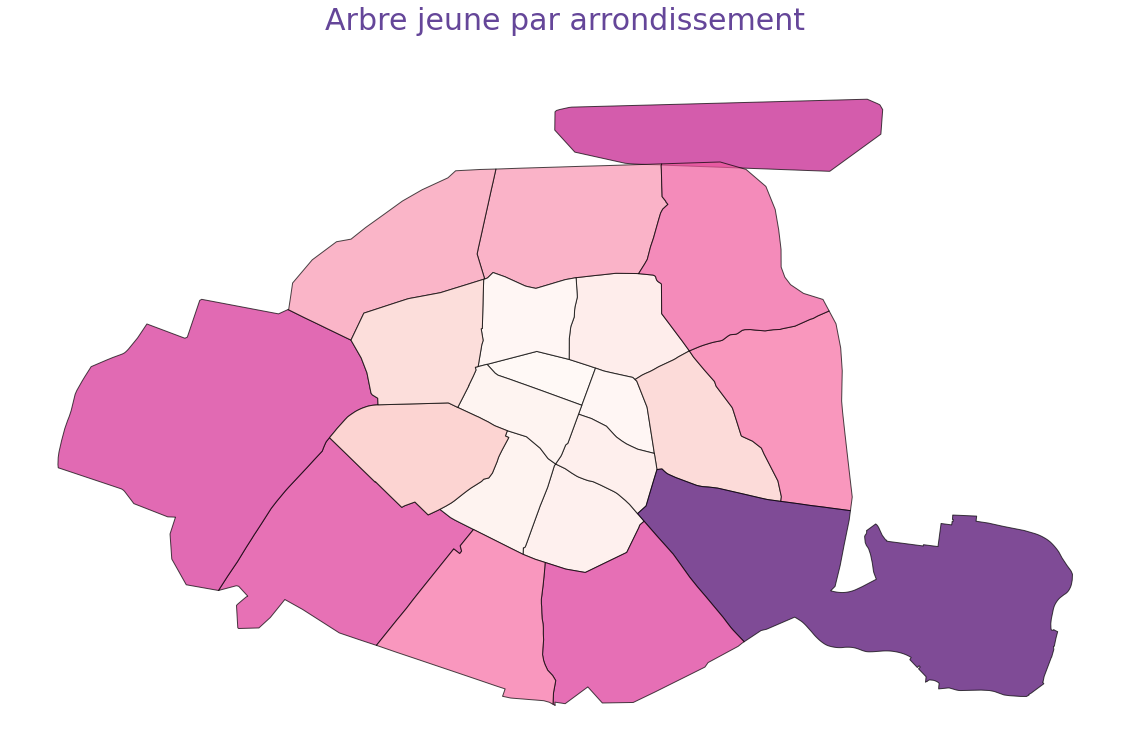

In [64]:
#jeune = arbre.loc[(arbre['stadedeveloppement'] == "Jeune (arbre)")]
# spatial join: determine in which district each tree is located
#jeune = gpd.sjoin(jeune, dfa[['l_ar', 'geometry']], op='within')
# count the number of stations per district, and add this information to the
# districts dataframe
#counts = jeune.groupby('l_ar').size()
#dfa = dfa.merge(counts.reset_index(name='n_jeune'))
# calculate the relative number of bike stations divided by the area
dfag['n_jeune_relative'] = dfag['n_jeune'] / dfag.geometry.area
ax = dfag.plot(column='n_jeune',
              figsize=(20, 15),
              cmap='RdPu',
#              legend=True,
              edgecolor='k',
              alpha=0.7,)
#              legend_kwds={'label': "x 10000",
#                           'orientation': "horizental"})
ax.set_title("Arbre jeune par arrondissement\n", fontdict=font_jeune) 
#ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

In [65]:
jeune_qr = arbre.loc[(arbre['stadedeveloppement'] == "Jeune (arbre)")]
jeune_qr = gpd.sjoin(jeune_qr, dfr[['l_qu', 'geometry']], op='within')
#jeune_qr

In [66]:
counts = jeune_qr.groupby('l_qu').size()
#counts

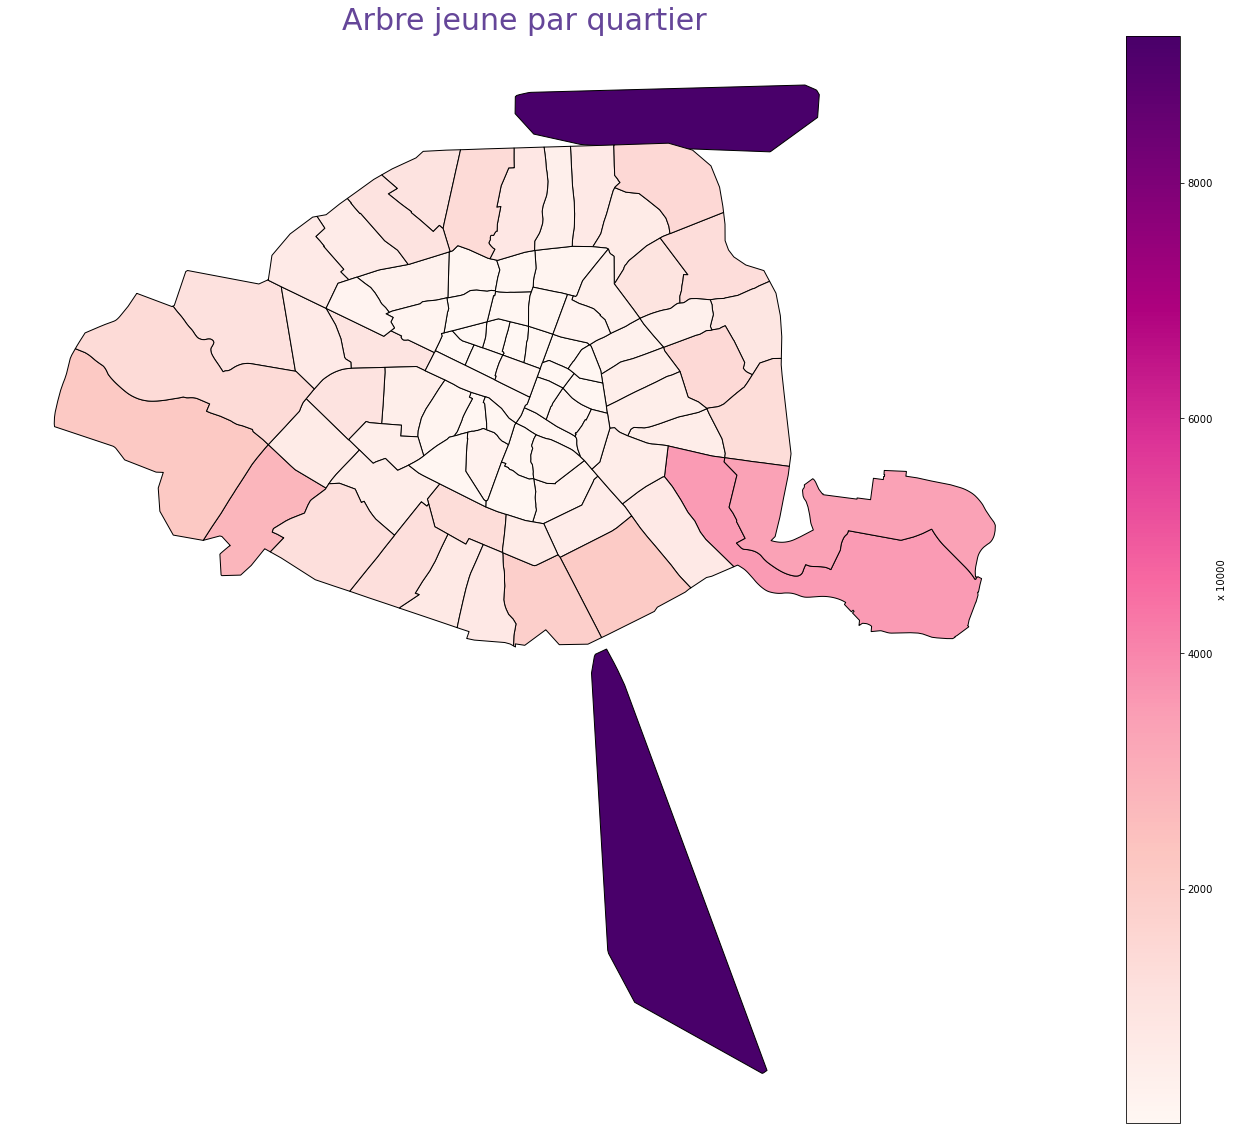

In [67]:
#jeune = arbre.loc[(arbre['stadedeveloppement'] == "Jeune (arbre)")]
# spatial join: determine in which district each young tree is located
#jeune = gpd.sjoin(jeune, dfr[['l_qu', 'geometry']], op='within')
# count the number of stations per district, and add this information to the
# districts dataframe
#counts = jeune.groupby('l_qu').size()
dfrg = dfr.merge(counts.reset_index(name='n_jeune'))
# calculate the relative number of bike stations divided by the area
dfrg['n_jeune_relative'] = dfrg['n_jeune'] / dfrg.geometry.area


#newdf = overlay(dfr, qr, how="union")
ax = dfrg.plot(column='n_jeune', 
              figsize=(30, 20), 
              cmap='RdPu', 
              legend=True,
              edgecolor='k',
              legend_kwds={'label': "x 10000",
                           'orientation': "vertical"})
ax.set_title("Arbre jeune par quartier", fontdict=font_jeune) 
#ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

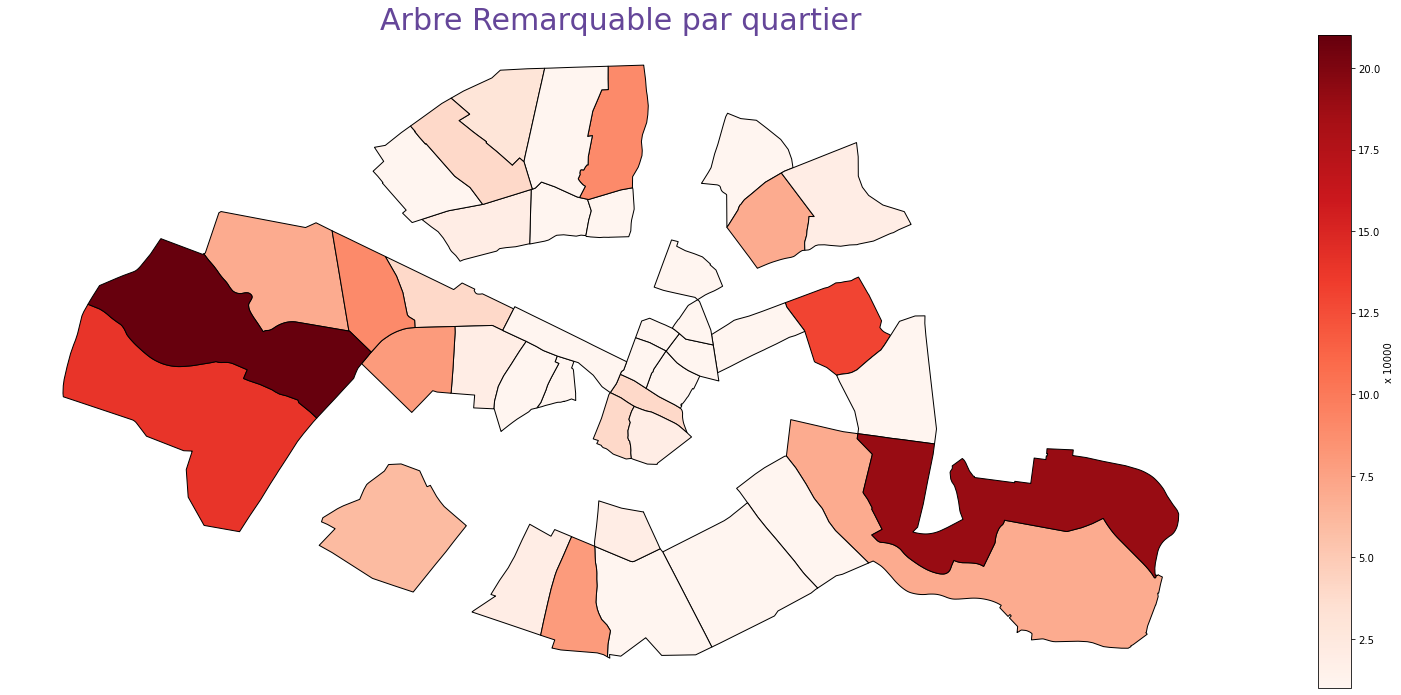

In [68]:
remarquable = arbre.loc[(arbre['remarquable'] == 'OUI')]
# spatial join: determine in which district each tree is located
remarquable = gpd.sjoin(remarquable, dfr[['l_qu', 'geometry']], op='within')
# count the number of stations per district, and add this information to the
# districts dataframe
counts = remarquable.groupby('l_qu').size()
dfr2 = dfr.merge(counts.reset_index(name='n_remarquable'))
# calculate the relative number of bike stations divided by the area
dfr2['n_remarquable_relative'] = dfr2['n_remarquable'] / dfr2.geometry.area
ax = dfr2.plot(column='n_remarquable',
              figsize=(30, 12),
              cmap='Reds', 
              legend=True,
              edgecolor='k',
              legend_kwds={'label': "x 10000",
                           'orientation': "vertical"})
ax.set_title("Arbre Remarquable par quartier", fontdict=font_jeune) 
ax.set_axis_off()

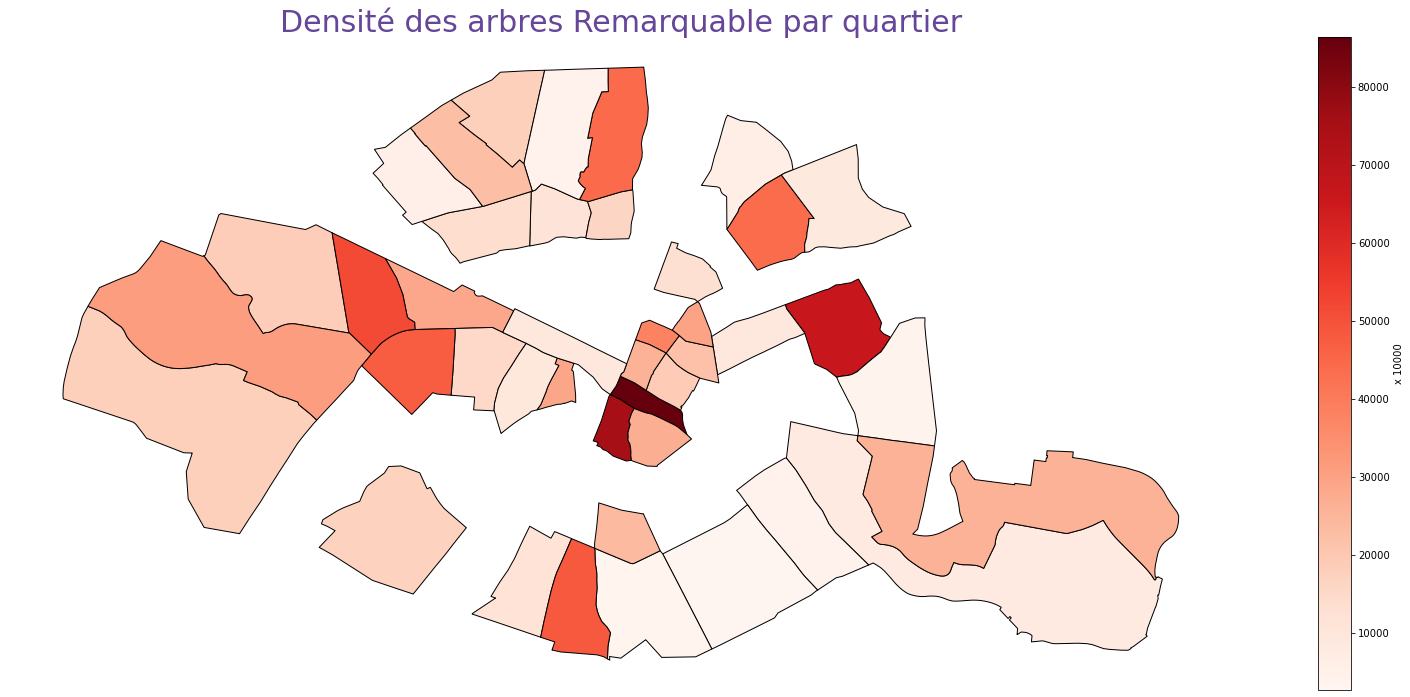

In [69]:
remarquable = arbre.loc[(arbre['remarquable'] == 'OUI')]
# spatial join: determine in which district each tree is located
remarquable = gpd.sjoin(remarquable, dfr[['l_qu', 'geometry']], op='within')
# count the number of stations per district, and add this information to the
# districts dataframe
counts = remarquable.groupby('l_qu').size()
dfr2r = dfr.merge(counts.reset_index(name='n_remarquable'))
# calculate the relative number of bike stations divided by the area
dfr2r['n_remarquable_relative'] = dfr2r['n_remarquable'] / dfr2r.geometry.area
ax = dfr2r.plot(column='n_remarquable_relative',
              figsize=(30, 12),
              cmap='Reds', 
              legend=True,
              edgecolor='k',
              legend_kwds={'label': "x 10000",
                           'orientation': "vertical"})
ax.set_title("Densité des arbres Remarquable par quartier", fontdict=font_jeune) 
ax.set_axis_off()

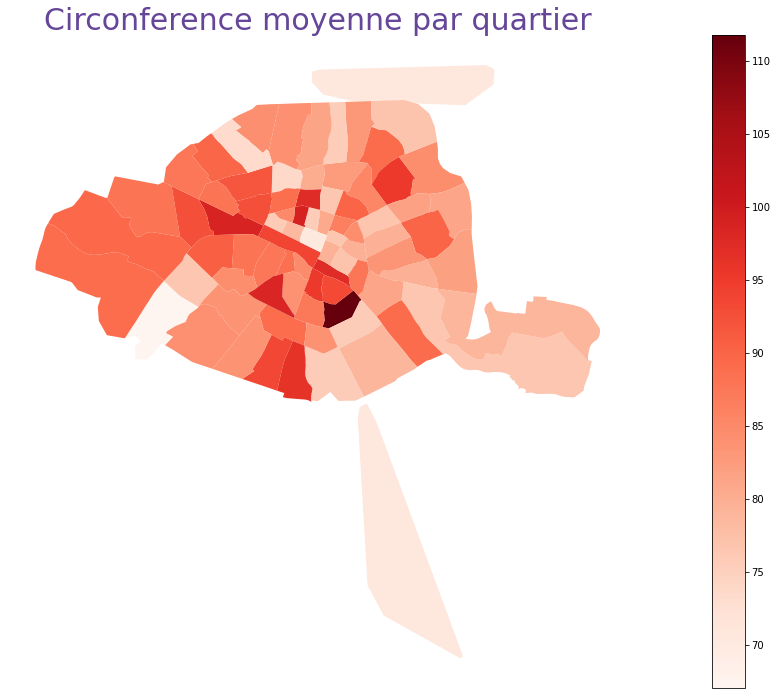

In [70]:
circon = arbre
# spatial join: determine in which district each tree is located
circon = gpd.sjoin(circon, dfr[['l_qu', 'geometry']], op='within')
# count the number of stations per district, and add this information to the
# districts dataframe
counts = circon.groupby('l_qu').circonferenceencm.mean()
dfr3 = dfr.merge(counts.reset_index(name='n_circonferenceencm'))
# calculate the relative number of bike stations divided by the area
dfr3['n_circonferenceencm_relative'] = dfr3['n_circonferenceencm'] / dfr3.geometry.area
ax = dfr3.plot(column='n_circonferenceencm',
#              scheme='QUANTILES',
#              k=4,
              figsize=(30, 12),
              cmap='Reds', 
              legend=True)
ax.set_title("Circonference moyenne par quartier", fontdict=font_jeune) 
ax.set_axis_off()


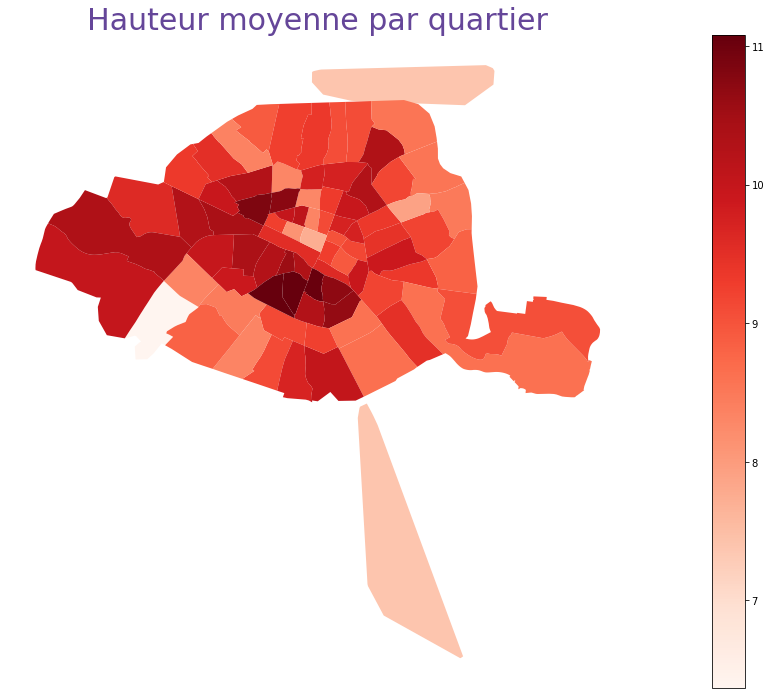

In [71]:
hauteure = arbre
# spatial join: determine in which district each tree is located
hauteure = gpd.sjoin(hauteure, dfr[['l_qu', 'geometry']], op='within')
# count the number of stations per district, and add this information to the
# districts dataframe
counts = hauteure.groupby('l_qu').hauteurenm.mean()
dfr4 = dfr.merge(counts.reset_index(name='n_hauteure'))
# calculate the relative number of bike stations divided by the area
dfr4['n_hauteure_relative'] = dfr4['n_hauteure'] / dfr4.geometry.area
ax = dfr4.plot(column='n_hauteure',
#              scheme='QUANTILES',
#              k=4,
              figsize=(30, 12),
              cmap='Reds', 
              legend=True)
ax.set_title("Hauteur moyenne par quartier", fontdict=font_jeune) 
ax.set_axis_off()

<hr /><h1 style="text-align: center;"><em><strong><span style="color: #654699;">🗺 Outils d'aide à l'optimisation des tournées</span></em></h1><hr />

In [76]:
#
def id_to_lat_lon(df, id):
    """
    retourne longitute et latitude a partir de l'id d'arbre
    """ 
    lon = df[df['idbase']==id].lon
    lat = df[df['idbase']==id].lat
    return lon, lat

def peri_from_id(df, id, radius):
    """
    retourne un cercle de centre l'arbre dans l'id est passé et de rayon radius
    """ 
    radius = radius / 1000 
    lon = float(id_to_lat_lon(df, id)[0])
    lat = float(id_to_lat_lon(df, id)[1]) 
    proj_crs = ProjectedCRS(
        conversion = AzumuthalEquidistantConversion(lat, lon)
    )
    proj_wgs84 = pyproj.Proj('EPSG:4326')
    Trans = pyproj.Transformer.from_proj(
        proj_crs,
        proj_wgs84,
        always_xy=True
    ).transform

    return transform(Trans, Point(0, 0).buffer(radius * 1000))

def gdf_peri_from_id(df, id, radius):
    """
    retourne un geodataframe contenant le cercle de centre l'arbre dont l'id est passé et de rayon radius
    """ 
    return gpd.GeoDataFrame(df.drop('geometry',axis=1)[df['idbase']==id].reset_index(), geometry=gpd.GeoSeries(peri_from_id(df, id, radius)))

In [73]:
arbre['lon'] = arbre.geometry.x
arbre['lat'] = arbre.geometry.y

In [74]:
#df['lon'] = df.geometry.x
#df['lat'] = df.geometry.y

In [1308]:
def list_in_peri_from_id(df, id, radius):
    """
    retourne un geodataframe contenant la liste des arbres dans le cercle de centre l'arbre dont l'id est passé et de rayon radius
    """ 
    a = gpd.sjoin(df, gdf_peri_from_id(df, id, radius)[['idbase','geometry']], op='within')
    a = a.reset_index()
    a = a.to_crs('EPSG:2154')
    ref = a[(a['idbase_left']==id)].geometry.iloc[0]
    a['distance'] = a['geometry'].distance(ref)
    return a

In [1292]:
def tab_from_list_in_peri_from_id(df, id, radius):
    arbre_dans_peri = gpd.sjoin(df, gdf_peri_from_id(df, id, radius)[['idbase','geometry']], op='within')
    nb = print(f"nombre d'arbre dans ce périmetre : {len(arbre_dans_peri)}")
    tab = arbre_dans_peri.groupby(['stadedeveloppement','genre']).circonferenceencm.describe().style.set_caption("Desciption des arbres dans ce périmetre").set_table_styles(styles) 
    return display(tab, nb)

In [622]:
def nb_remarquable(df):
    return df[df['remarquable']=='OUI'].count()[0]

In [1329]:
list_id = list_in_peri_from_id(arbre, 125051, 20)
list_id

,index,libellefrancais,domanialite,arrondissement,idbase_left,genre,remarquable,geometry,circonferenceencm,hauteurenm,stadedeveloppement,lon,lat,distance,ref,index_right,idbase_right
0,6565,Tamaris,Jardin,PARIS 4E ARRDT,125051.0,Tamarix,OUI,POINT (652436.527 6861563.471),230.0,3.0,Mature,2.351810,48.852355,0.000000,NaN,0,125051.0
1,20221,Tilleul,Jardin,PARIS 4E ARRDT,125020.0,Tilia,NON,POINT (652423.632 6861553.649),156.0,8.0,Adulte,2.351635,48.852266,16.209646,NaN,0,125051.0
2,27037,Charme,Jardin,PARIS 4E ARRDT,125050.0,Carpinus,NON,POINT (652440.685 6861570.201),225.0,13.0,Adulte,2.351866,48.852416,7.910877,NaN,0,125051.0
3,143636,Tilleul,Jardin,PARIS 4E ARRDT,125013.0,Tilia,NON,POINT (652422.823 6861562.044),62.0,6.0,Jeune (arbre)Adulte,2.351623,48.852341,13.778096,NaN,0,125051.0
4,153801,Arbre à soie,Jardin,PARIS 4E ARRDT,125053.0,Albizia,NON,POINT (652432.108 6861548.037),55.0,6.0,Jeune (arbre),2.351751,48.852216,16.054157,NaN,0,125051.0


In [1293]:
tab_peri = tab_from_list_in_peri_from_id(arbre, 250468.0, 50)
tab_peri

nombre d'arbre dans ce périmetre : 38


None

In [81]:
nb_remarquable(list_peri)

0

In [600]:
def graf_hauteur_m_id(df, id, radius):
    counts = list_in_peri_from_id(df, id, radius).groupby('idbase_left').hauteurenm.max()
    dfr4 = list_in_peri_from_id(df, id, radius).merge(counts.reset_index(name='n_hauteure'))
    ax = dfr4.plot(column='n_hauteure',
                  figsize=(30, 12),
                  cmap='Blues', 
                  legend=True)
    ax.set_title("Hauteur en m dans le perimetre", fontdict=font_jeune) 
    ax.set_axis_off()

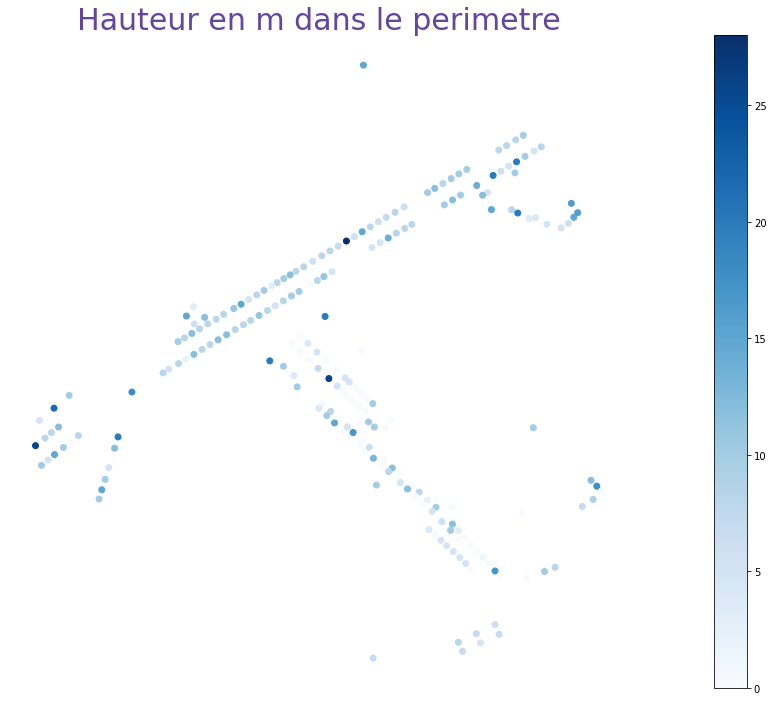

In [601]:
graf_hauteur_m_id(arbre, 159390, 200)

In [604]:
def graf_circon_id(df, id, radius):
    counts = list_in_peri_from_id(df, id, radius).groupby('idbase_left').circonferenceencm.max()
    dfr4 = list_in_peri_from_id(df, id, radius).merge(counts.reset_index(name='n_circonferenceencm'))
    ax = dfr4.plot(column='n_circonferenceencm',
                  figsize=(30, 12),
                  cmap='Reds', 
                  legend=True)
    ax.set_title("Circonference en cm dans le perimetre", fontdict=font_jeune) 
    ax.set_axis_off()

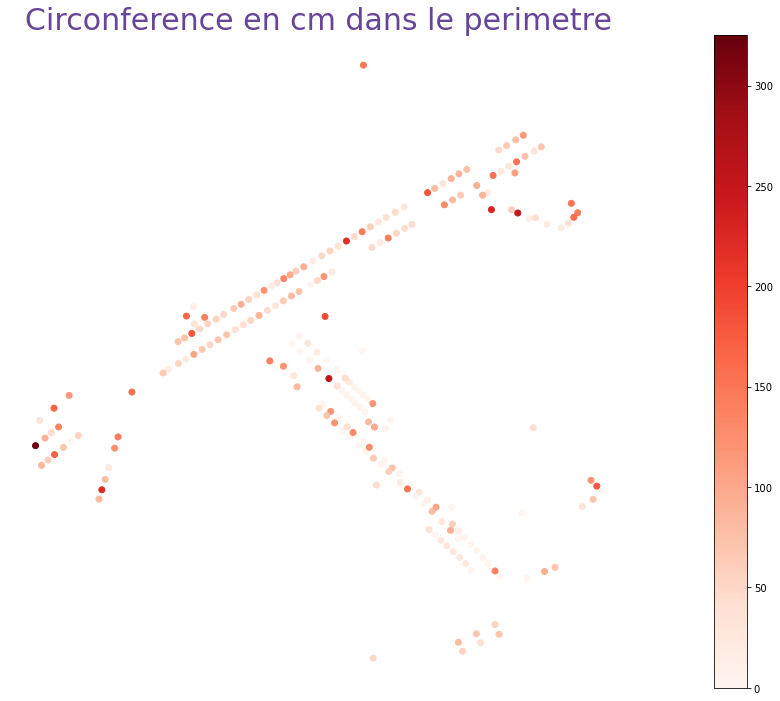

In [605]:
graf_circon_id(arbre, 159390, 200)

In [643]:
token = os.environ['API_MAPBOX_TOKEN']

In [644]:
def ou():
    global token
    adresse = input('Entrez une adresse : ')
    endpoint = 'https://api.mapbox.com/geocoding/v5/mapbox.places/'
    url = endpoint + adresse+'.json' +'?access_token='+ token
    req = requests.get(url, allow_redirects=True).json()['features'][0]['geometry']['coordinates']
    req = Point(req[0], req[1])
    d = {'Adresse': ['adresse'], 'geometry': [req]}
    req = gpd.GeoDataFrame(d, crs="EPSG:4326")
    req = req.to_crs('EPSG:2154').geometry.iloc[0]
    return req

In [645]:
def nearest(df):
    ref = ou()
    df = df.to_crs('EPSG:2154')
    df['distance'] = df['geometry'].distance(ref)
    l = df.sort_values('distance',ascending=True).reset_index().iloc[1]
    return print(f"L'arbre le plus proche est un '{l[1]}' c'est une arbre '{l[10]}' ayant une circonférence de {round(l[8])}cm et une hauteur de {round(l[9])}m situé à {round(l[13])} métres, son ID est {int(l[4])}")

In [646]:
def nearest_from_id(df, id):
    
    l = list_in_peri_from_id(df, id, 200)
    l = l.sort_values('distance',ascending=True).reset_index().iloc[1]
    return (f"L'arbre le plus proche est un '{l[2]}' c'est une arbre '{l[11]}' ayant une circonférence de {round(l[9])}cm et une hauteur de {round(l[10])}m situé à {round(l[14])} métres, son ID est {int(l[5])}")
    

In [1306]:
nearest(arbre)

Entrez une adresse : 15 rue clignancourt 75018
L'arbre le plus proche est un 'Cerisier à fleurs' c'est une arbre 'Adulte' ayant une circonférence de 62cm et une hauteur de 7m situé à 22 métres, son ID est 302294


In [1309]:
nearest_from_id(arbre, 250468.0)

"L'arbre le plus proche est un 'Frêne à fleurs' c'est une arbre 'Jeune (arbre)Adulte' ayant une circonférence de 25cm et une hauteur de 2m situé à 6 métres, son ID est 2002294"

<h2 style="text-align: center;"><em><strong><span style="color: #654699;">📜 Localisation et visualisation 3D des arbres Remarquables</span></em></h2>

In [1310]:
measure_color = 'stadedeveloppement'
color_breaks = [1, 2, 3, 4]
color_stops = create_color_stops(color_breaks, colors='Blues')

# Generate radius breaks from data domain and circle-radius range
measure_radius = 'circonferenceencm'
radius_breaks = [round(arb_rem[measure_radius].quantile(q=x*0.1), 2) for x in range(2, 10)]
radius_stops = create_radius_stops(radius_breaks, 0.5, 10)

# Create the viz
viz2 = GraduatedCircleViz('https://raw.githubusercontent.com/willmedia/p01/master/arb_rem.geojson', 
                          access_token=token,
                          color_property="stadedeveloppement",
                          color_stops=color_stops,
                          radius_property="circonferenceencm",
                          radius_stops=radius_stops,
                          stroke_color='black',
                          stroke_width=0.5,
                          center=(2.35, 48.85),
                          zoom=10,
                          opacity=0.75,
                          below_layer='waterway-label')

viz2.show()

In [968]:
#ajout d'une colonne avec le polygon cercle de centre lon et lat et de rayon le rayon de l'arbre
def cerc(x):
    radius = x[7] / 25
    radius = radius / 1000
    proj_crs = ProjectedCRS(
    conversion = AzumuthalEquidistantConversion(x[11], x[10])
    )
    proj_wgs84 = pyproj.Proj('EPSG:4326')
    Trans = pyproj.Transformer.from_proj(
    proj_crs,
    proj_wgs84,
    always_xy=True
    ).transform
    return transform(Trans, Point(0, 0).buffer(radius * 1000))

In [980]:
arb_rem = arbre.copy() 
arb_rem.stadedeveloppement.replace({
    "Jeune (arbre)" :1, 
    "Jeune (arbre)Adulte":2, 
    'Adulte' :3, 
    'Mature' :4,

}, inplace=True)
arb_rem = arb_rem[(arb_rem['remarquable']=='OUI')]
arb_rem = arb_rem
arb_rem = pd.DataFrame(arb_rem)
arb_rem['cercle']  = arb_rem.apply(cerc, axis = 1)
arb_rem = arb_rem[['idbase', 'libellefrancais', 'domanialite', 'circonferenceencm', 'hauteurenm', 'stadedeveloppement','cercle']]
arb_rem = gpd.GeoDataFrame(arb_rem, geometry=arb_rem.cercle)
arb_rem = arb_rem[['idbase', 'libellefrancais', 'domanialite', 'circonferenceencm', 'hauteurenm', 'stadedeveloppement','geometry']]
arb_rem['hauteurencm'] = arb_rem['hauteurenm']*100
arb_rem['circonference'] = arb_rem['circonferenceencm']/100
arb_rem.to_file('cercle_cir_rem13.geojson', driver="GeoJSON")  

In [1331]:
viz = ChoroplethViz('https://raw.githubusercontent.com/willmedia/p01/master/cercle_cir_rem13.geojson', 
                    access_token=token,
                    color_property='stadedeveloppement',
                    color_stops=create_color_stops([1, 2, 3, 4], colors='YlOrRd'),
                    color_function_type='interpolate',
                    line_stroke='--',
                    line_color='rgb(128,0,38)',
                    line_width=1,
                    line_opacity=0.9,
                    opacity=0.8,
                    center=(2.351810, 48.852355),
                    zoom=15,
                    below_layer='waterway-label',
                    legend_layout='horizontal',
                    legend_key_shape='bar',
                    legend_key_borders_on=False)

# adjust view angle
viz.bearing = -8
viz.pitch = 55

# add extrusion to viz using interpolation keyed on density in GeoJSON features
viz.height_property = 'hauteurencm' 
viz.height_stops = create_numeric_stops([0, 500, 1000, 1500, 2000, 2500, 3000, 3500], 0, 400)
#viz.height_function_type = 'interpolate'

# render again
viz.show()

In [995]:
viz.create_html('test.html')